# Task 2: Exploratory Data Analysis

## Importing packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

---

## Loading and Checking Data

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

Listing out column names

In [3]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [4]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [7]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## Variable Description

#### client_data.csv

 - id = client company identifier
 - activity_new = category of the company’s activity
 - channel_sales = code of the sales channel
 - cons_12m = electricity consumption of the past 12 months
 - cons_gas_12m = gas consumption of the past 12 months
 - cons_last_month = electricity consumption of the last month
 - date_activ = date of activation of the contract
 - date_end = registered date of the end of the contract
 - date_modif_prod = date of the last modification of the product
 - date_renewal = date of the next contract renewal
 - forecast_cons_12m = forecasted electricity consumption for next 12 months
 - forecast_cons_year = forecasted electricity consumption for the next calendar year
 - forecast_discount_energy = forecasted value of current discount
 - forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
 - forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
 - forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
 - forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
 - has_gas = indicated if client is also a gas client
 - imp_cons = current paid consumption
 - margin_gross_pow_ele = gross margin on power subscription
 - margin_net_pow_ele = net margin on power subscription
 - nb_prod_act = number of active products and services
 - net_margin = total net margin
 - num_years_antig = antiquity of the client (in number of years)
 - origin_up = code of the electricity campaign the customer first subscribed to
 - pow_max = subscribed power
 - churn = has the client churned over the next 3 months

---
#### price_data.csv

 - id = client company identifier
 - price_date = reference date
 - price_off_peak_var = price of energy for the 1st period (off peak)
 - price_peak_var = price of energy for the 2nd period (peak)
 - price_mid_peak_var = price of energy for the 3rd period (mid peak)
 - price_off_peak_fix = price of power for the 1st period (off peak)
 - price_peak_fix = price of power for the 2nd period (peak)
 - price_mid_peak_fix = price of power for the 3rd period (mid peak)


In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


---

## Descriptive statistics of data


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

#### Statistical Summary for Client_df

In [9]:
# Numerical columns only
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [10]:
# For Dtype = Object only
client_df.describe(include =['O']).T

,count,unique,top,freq
id,14606,14606,24011ae4ebbe3035111d65fa7c15bc57,1
channel_sales,14606,8,foosdfpfkusacimwkcsosbicdxkicaua,6754
date_activ,14606,1796,2009-08-01,95
date_end,14606,368,2016-02-01,145
date_modif_prod,14606,2129,2015-11-01,721
date_renewal,14606,386,2015-06-23,587
has_gas,14606,2,f,11955
origin_up,14606,6,lxidpiddsbxsbosboudacockeimpuepw,7097
year_activ,14606,12,2012,3704


#### Statistical Summary for price_df

In [24]:
price_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,193002,16096,038af19179925da21a25619c5a24b745,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_date,193002,12,2015-08-01,16094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_off_peak_var,193002.0,NaN,NaN,NaN,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.2807
price_peak_var,193002.0,NaN,NaN,NaN,0.05463,0.049924,0.0,0.0,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,NaN,NaN,NaN,0.030496,0.036298,0.0,0.0,0.0,0.072558,0.114102
price_off_peak_fix,193002.0,NaN,NaN,NaN,43.334477,5.410297,0.0,40.728885,44.26693,44.44471,59.44471
price_peak_fix,193002.0,NaN,NaN,NaN,10.622875,12.841895,0.0,0.0,0.0,24.339581,36.490692
price_mid_peak_fix,193002.0,NaN,NaN,NaN,6.409984,7.773592,0.0,0.0,0.0,16.226389,17.458221


In [10]:
price_df.shape

(193002, 8)

### Univariate Data Analysis


Client_df

In [3]:
###### store columns with specific data type
C_integer_columns = client_df.select_dtypes(include=['int64']).columns
C_float_columns = client_df.select_dtypes(include=['float64']).columns
C_object_columns = client_df.select_dtypes(include=['object']).columns
  
# display columns
print('\nint64 columns:\n',C_integer_columns)
print('\nfloat64 columns:\n',C_float_columns)
print('\nobject columns:\n',C_object_columns)


int64 columns:
 Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year',
       'nb_prod_act', 'num_years_antig', 'churn'],
      dtype='object')

float64 columns:
 Index(['forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'],
      dtype='object')

object columns:
 Index(['id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'has_gas', 'origin_up'],
      dtype='object')


price_df

In [13]:
# store columns with specific data type
P_integer_columns = price_df.select_dtypes(include=['int64']).columns
P_float_columns = price_df.select_dtypes(include=['float64']).columns
P_object_columns = price_df.select_dtypes(include=['object']).columns
  
# display columns
print('\nint64 columns:\n',P_integer_columns)
print('\nfloat64 columns:\n',P_float_columns)
print('\nobject columns:\n',P_object_columns)


int64 columns:
 Index([], dtype='object')

float64 columns:
 Index(['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

object columns:
 Index(['id', 'price_date'], dtype='object')


**Categorical Variables (client_df)**: 
channel_sales, has_gas, origin_up, and churn.

**Dates (Client_df)**: date_activ, date_end, date_modif_prod and date_renewal

**Numerical Variables(client_df)**:
cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig, forecast_cons_12m', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons','margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max


**Numerical Variables (price_df)**:
'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix' and 'price_mid_peak_fix'

**Date(price_df)**: 
price_date


#### Categorical Variables (client_df)

In [5]:
def bar_plot(variable):
    """
        input: variable ex: "churn"
        output: bar plot & value count
    """
    # get feature
    var = client_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue, color= "#027A8F")
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

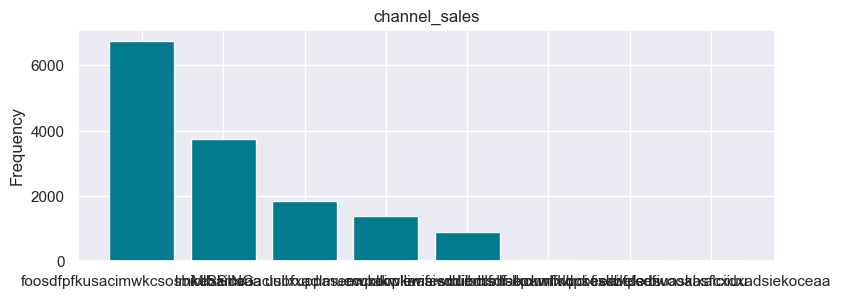

channel_sales: 
 foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64


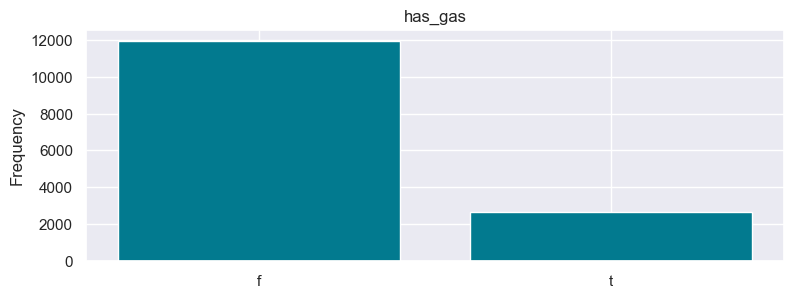

has_gas: 
 f    11955
t     2651
Name: has_gas, dtype: int64


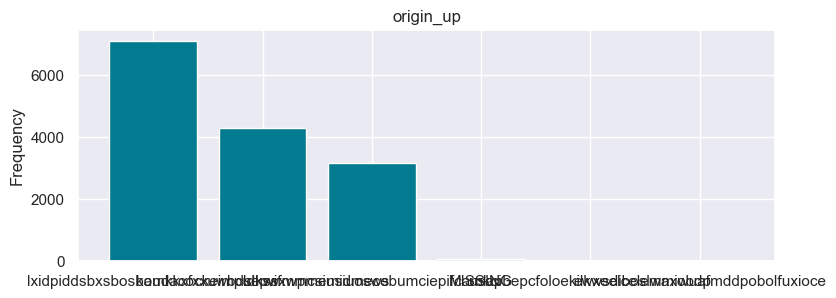

origin_up: 
 lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64


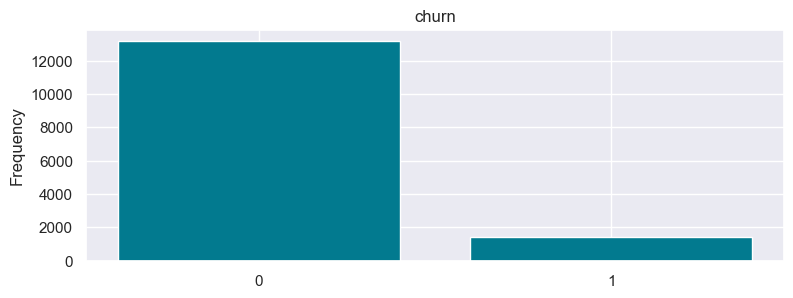

churn: 
 0    13187
1     1419
Name: churn, dtype: int64


In [5]:
C_category = ['channel_sales', 'has_gas', 'origin_up', 'churn']
for c in C_category:
    bar_plot(c)

In [28]:
C_dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for c in C_dates:
    print("{} \n".format(client_df[c].value_counts()))


2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2012-02-01    48
              ..
2007-03-16     1
2005-01-28     1
2009-02-01     1
2005-02-14     1
2004-12-29     1
Name: date_activ, Length: 1796, dtype: int64 

2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
             ... 
2017-01-29      1
2017-06-01      1
2017-01-28      1
2017-06-13      1
2017-06-11      1
Name: date_end, Length: 368, dtype: int64 

2015-11-01    721
2015-05-24    269
2015-12-17    199
2015-09-20    173
2015-12-16    172
             ... 
2007-01-29      1
2012-01-24      1
2010-12-28      1
2010-12-23      1
2015-05-08      1
Name: date_modif_prod, Length: 2129, dtype: int64 

2015-06-23    587
2015-03-09    451
2015-02-09    273
2015-07-04    265
2015-10-11    231
             ... 
2014-09-19      1
2015-01-17      1
2014-01-28      1
2013-12-22      1
2013-09-21      1
Name: date_renewal, Length: 386, dtype: int64 



#### Numerical Variables (client_df)

In [6]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(client_df[variable], bins = 50, color = '#8F0471')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

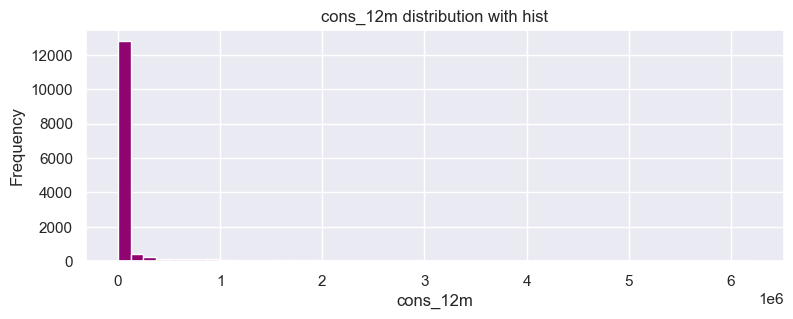

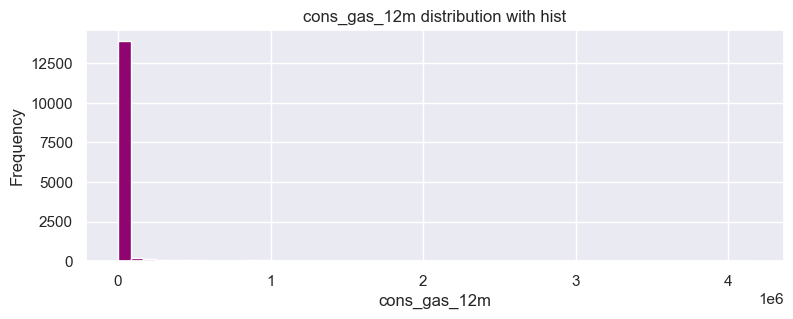

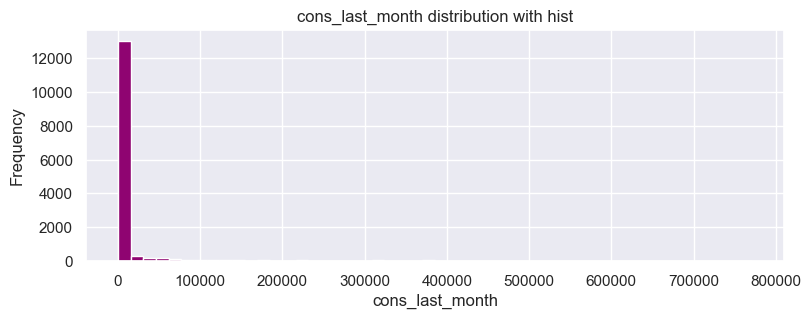

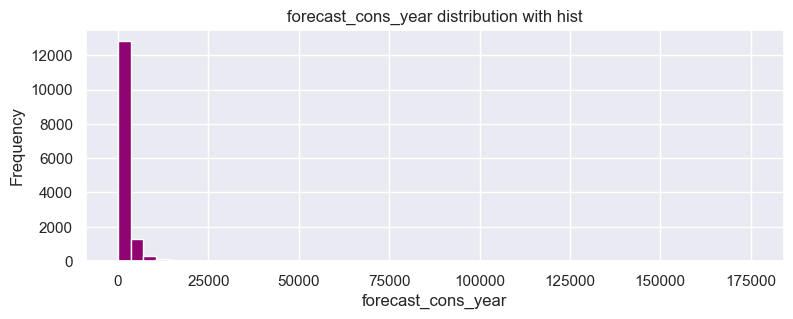

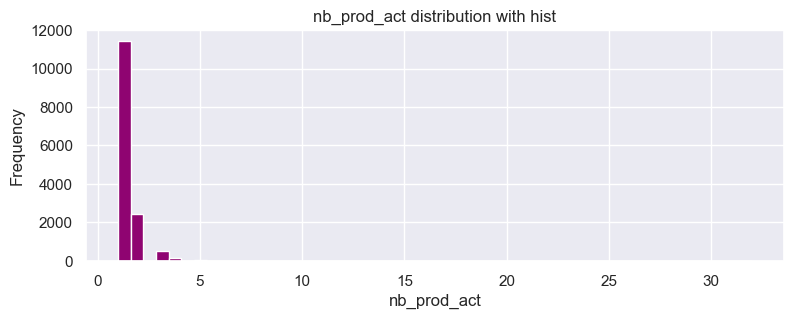

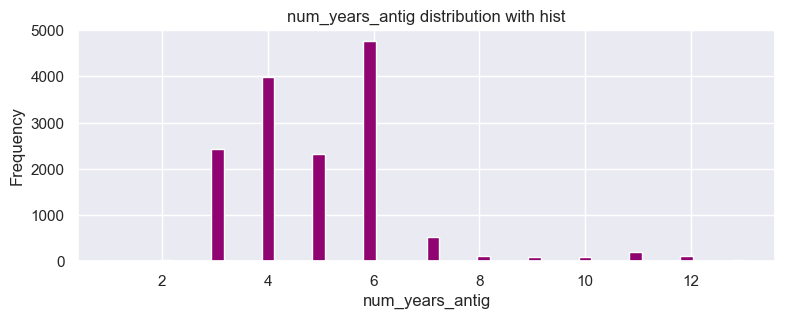

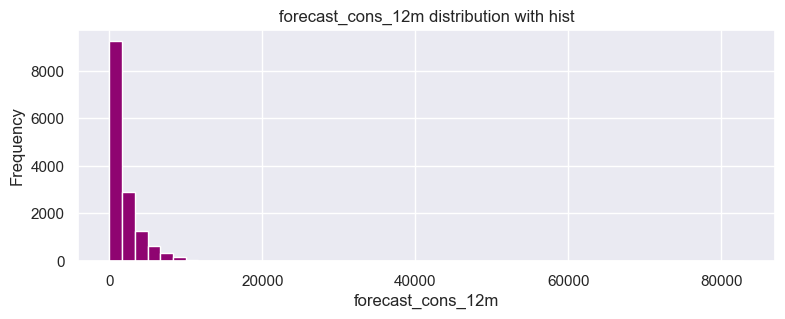

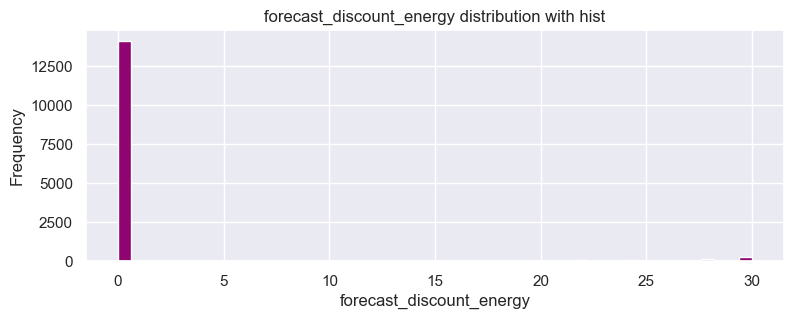

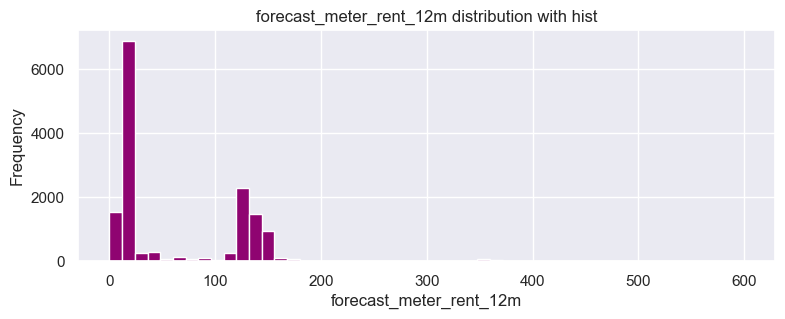

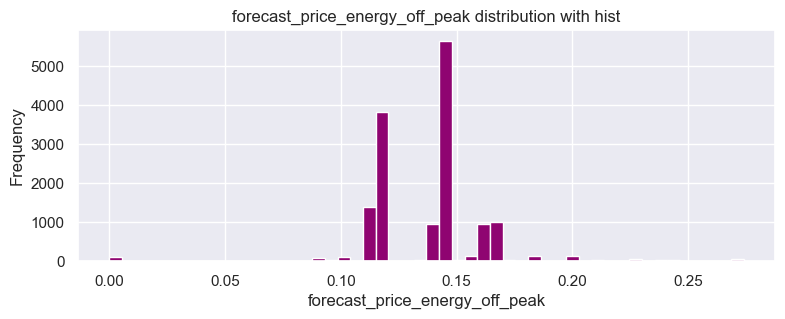

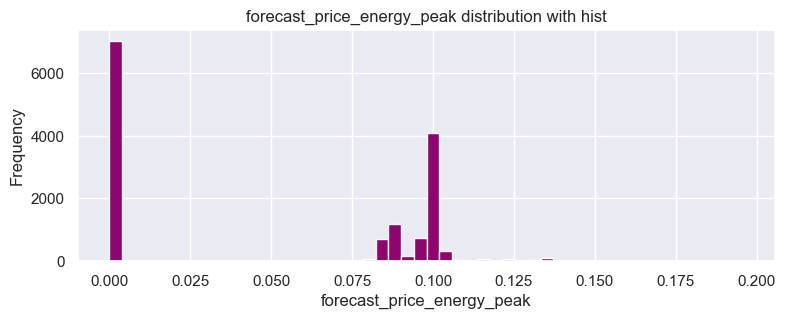

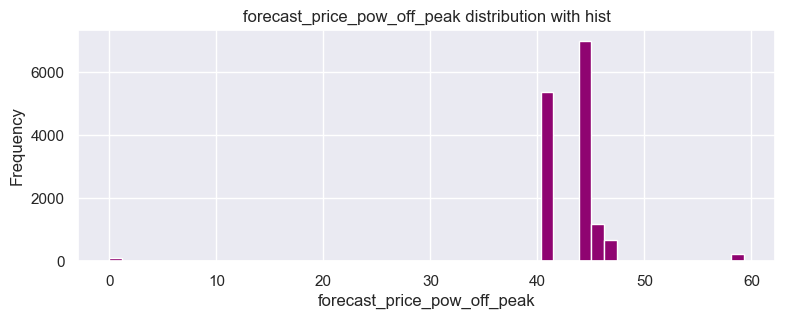

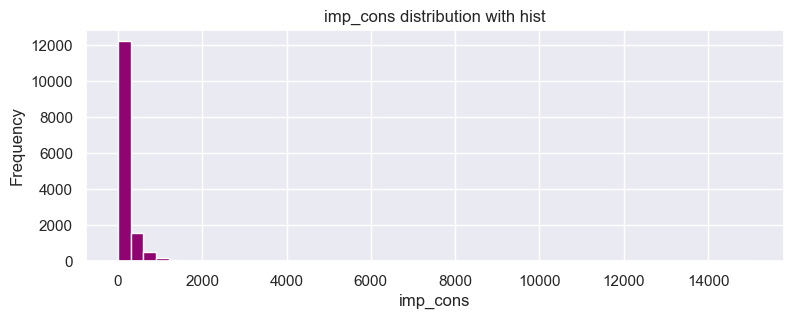

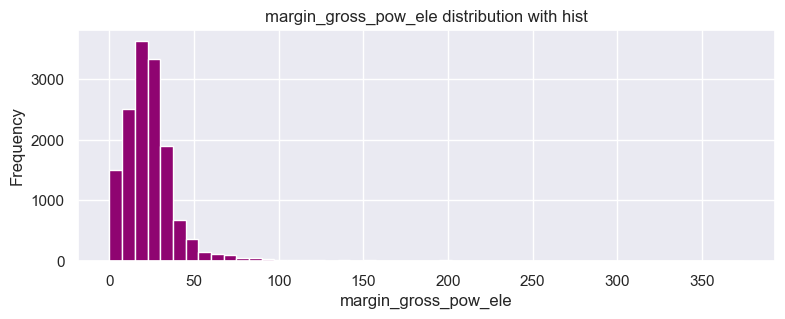

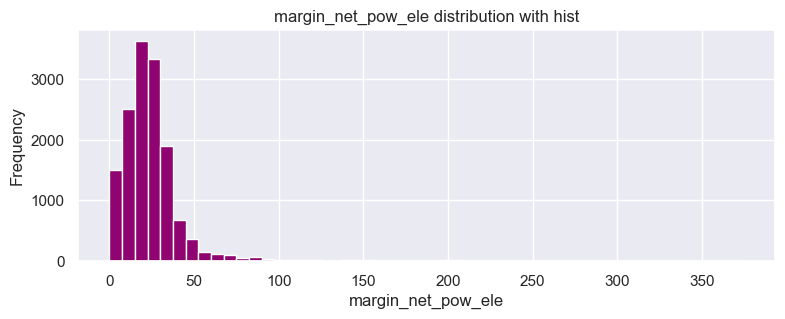

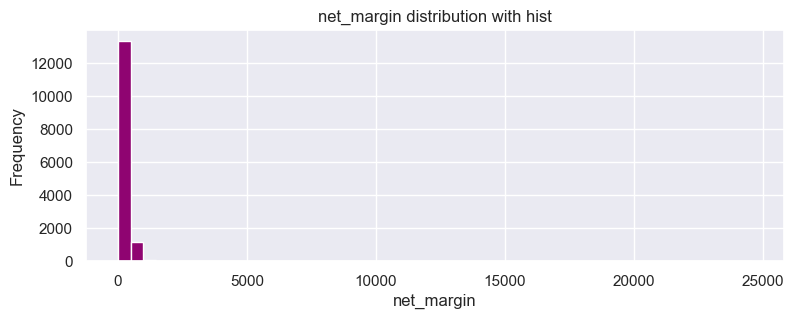

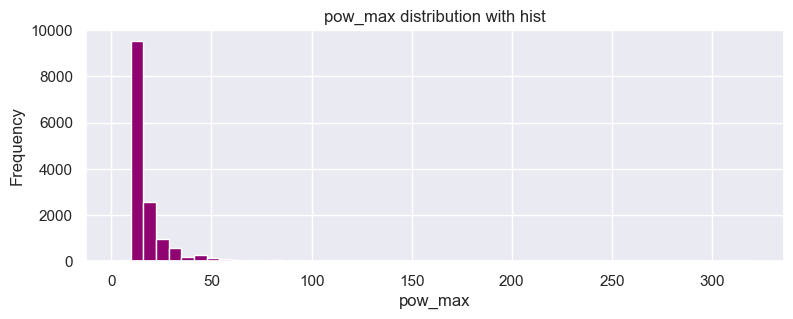

In [7]:
C_numerical = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'forecast_cons_12m', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons','margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
for n in C_numerical:
    plot_hist(n)

#### Numerical Variables (price_df)

In [35]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(price_df[variable], bins = 50, color = 'green')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

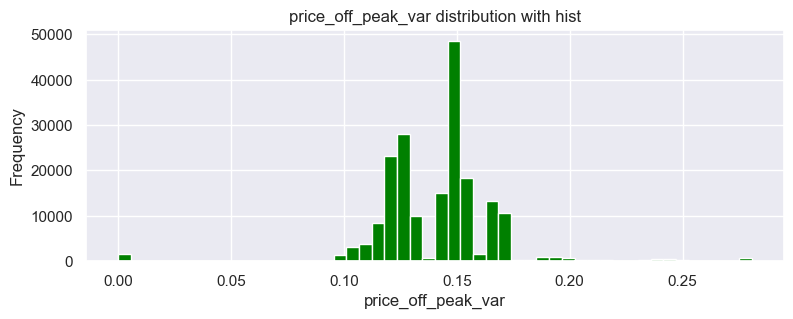

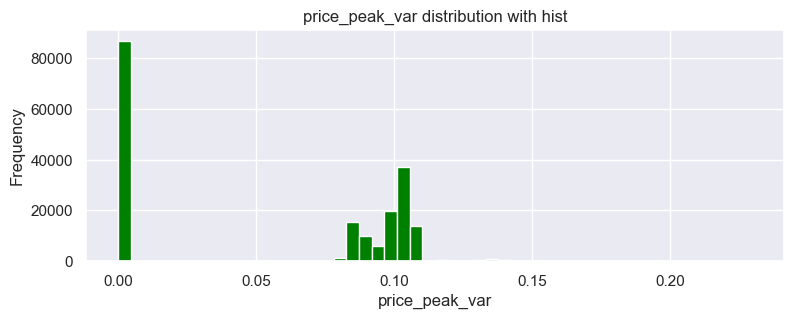

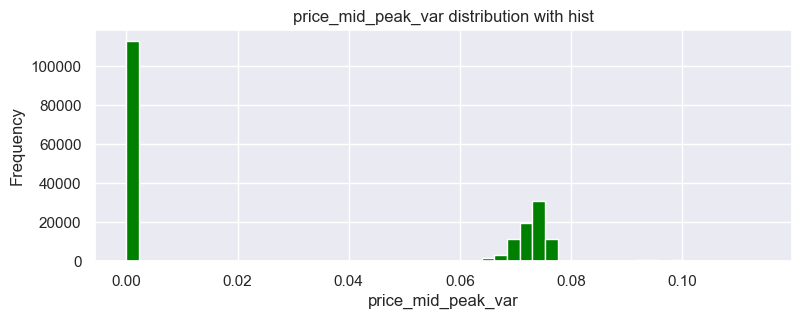

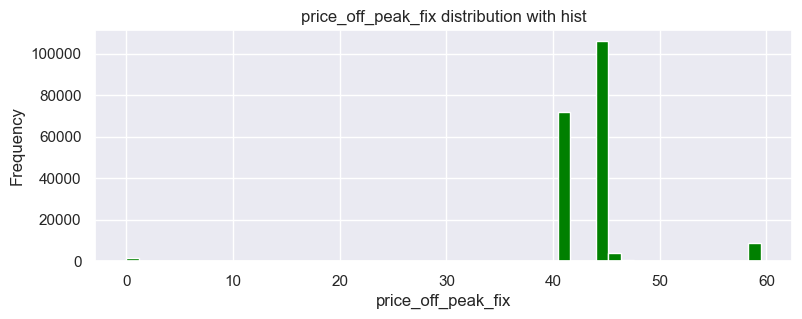

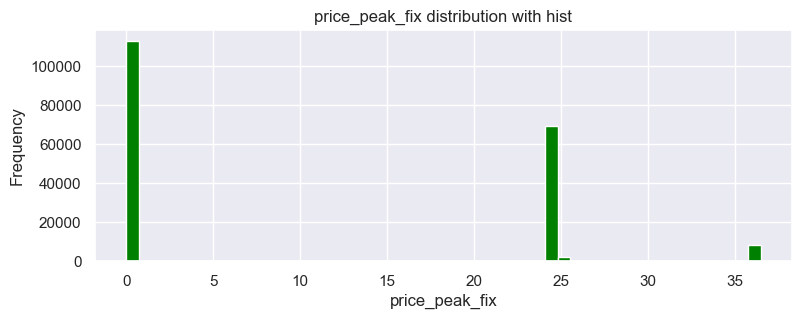

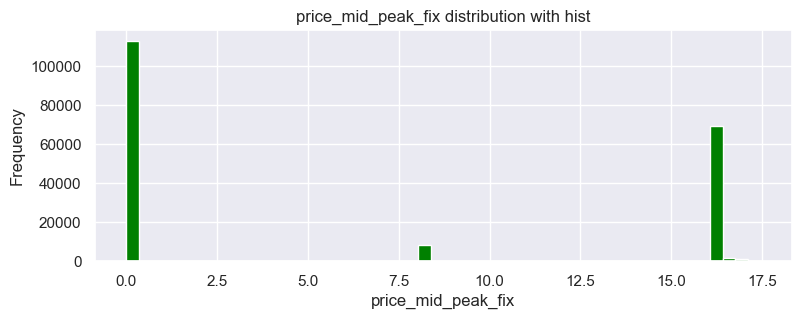

In [36]:
P_numerical = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for n in P_numerical:
    plot_hist(n)

In [6]:
# price_date column
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

---

## Visualizations 

Creating a function to create stacked bar plots

In [3]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### Churn

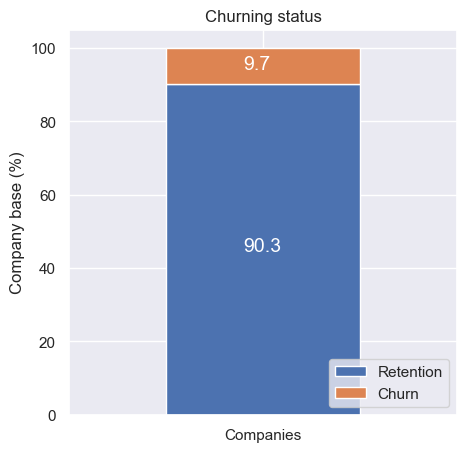

Churn value counts


0    13187
1     1419
Name: churn, dtype: int64

In [17]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

print("Churn value counts")
client_df['churn'].value_counts()

### channel_sales  --- churn

In [18]:
channel_sales_df = client_df[['id', 'channel_sales', 'churn']]
channel_sales_df = channel_sales_df.groupby([channel_sales_df['channel_sales'], channel_sales_df['churn']])['id'].count().unstack(level=1).fillna(0)
channel_sales_churn = (channel_sales_df.div(channel_sales_df.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

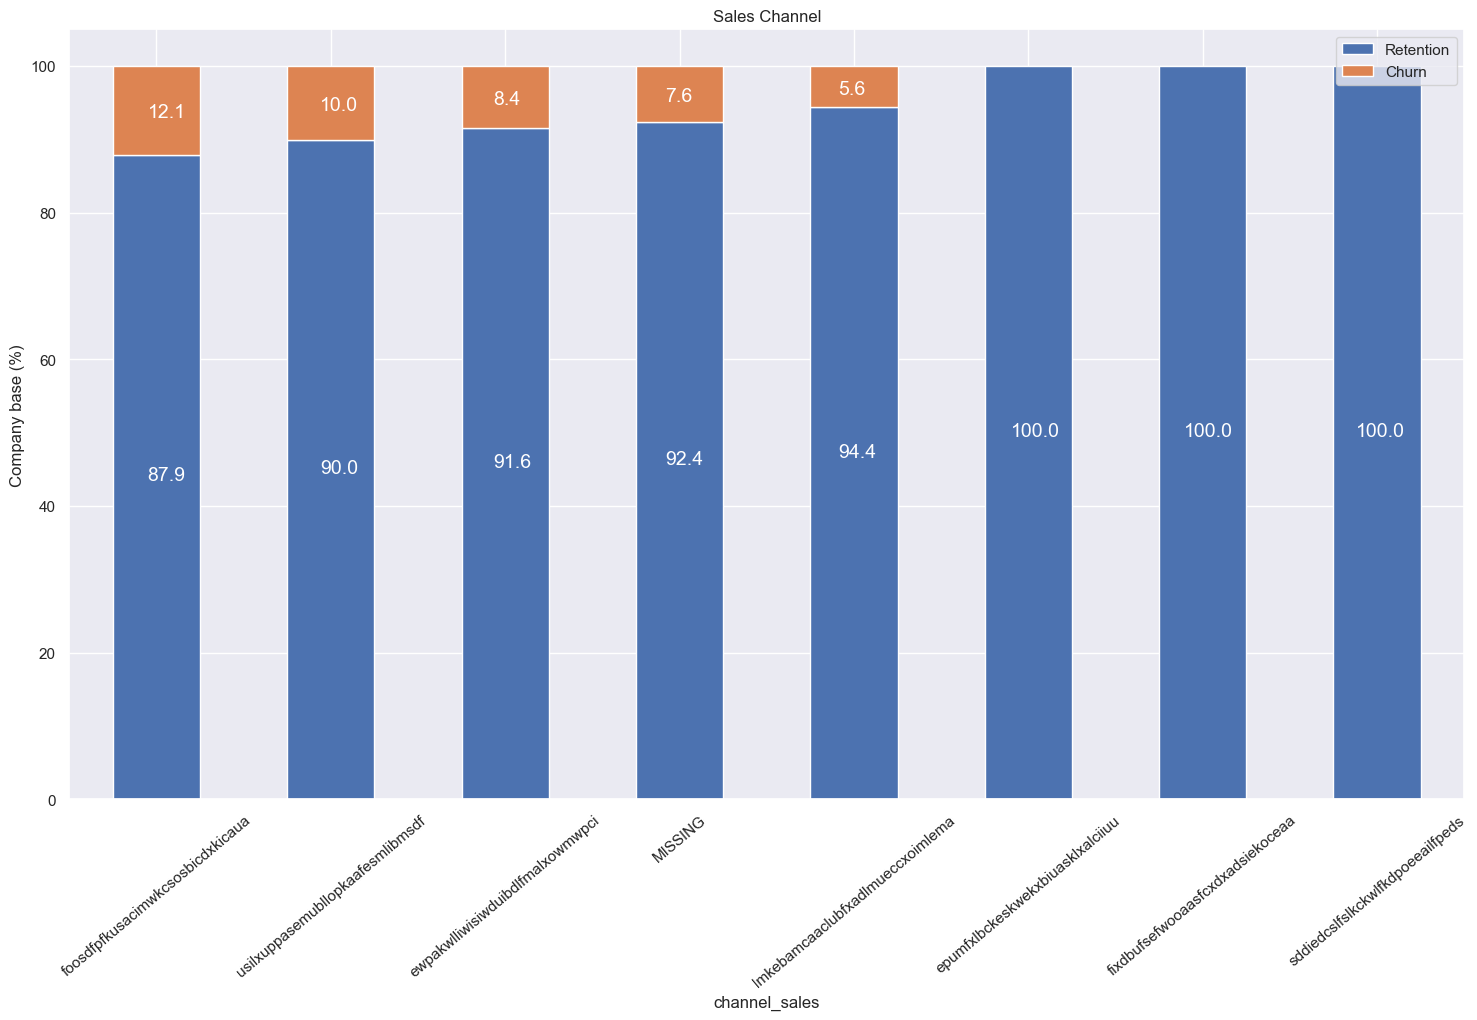

In [19]:
plot_stacked_bars(channel_sales_churn, 'Sales Channel', rot_=40)

In [20]:
channel_sales_df.head()

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0


### has_gas --- churn

In [22]:
has_gas_df = client_df[['id', 'has_gas', 'churn']]
has_gas_df = has_gas_df.groupby([has_gas_df['churn'], has_gas_df['has_gas']])['id'].count().unstack(level=0)
has_gas_percentage = (has_gas_df.div(has_gas_df.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

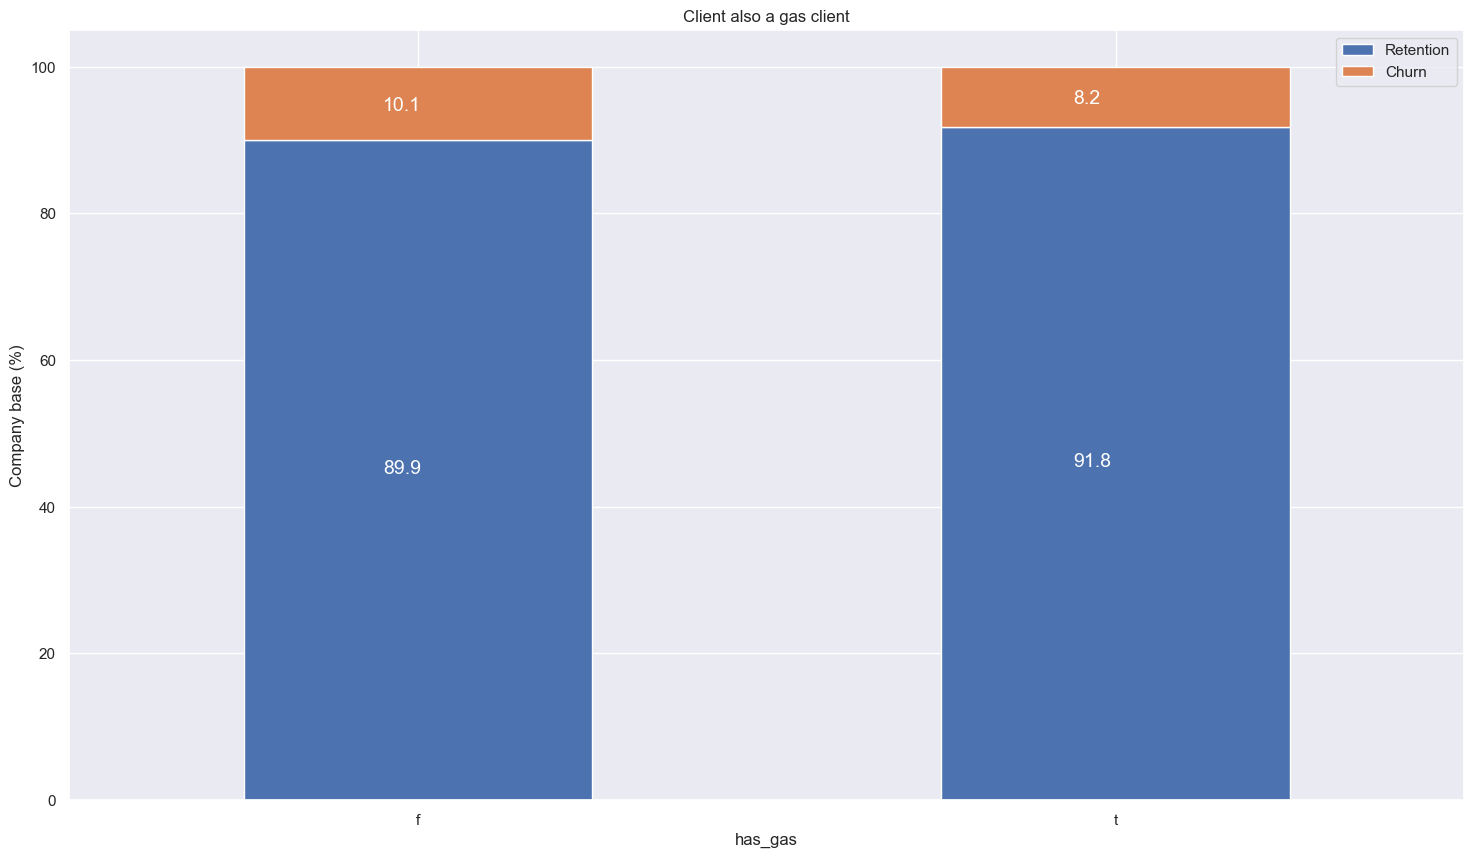

In [23]:
plot_stacked_bars(has_gas_percentage, 'Client also a gas client')

### origin_up --- churn

In [27]:
origin_up_df = client_df[['id', 'origin_up', 'churn']]
origin_up_df = origin_up_df.groupby([origin_up_df['origin_up'], origin_up_df['churn']])['id'].count().unstack(level=1)
origin_up_percentage = (origin_up_df.div(origin_up_df.sum(axis=1), axis=0) * 100)

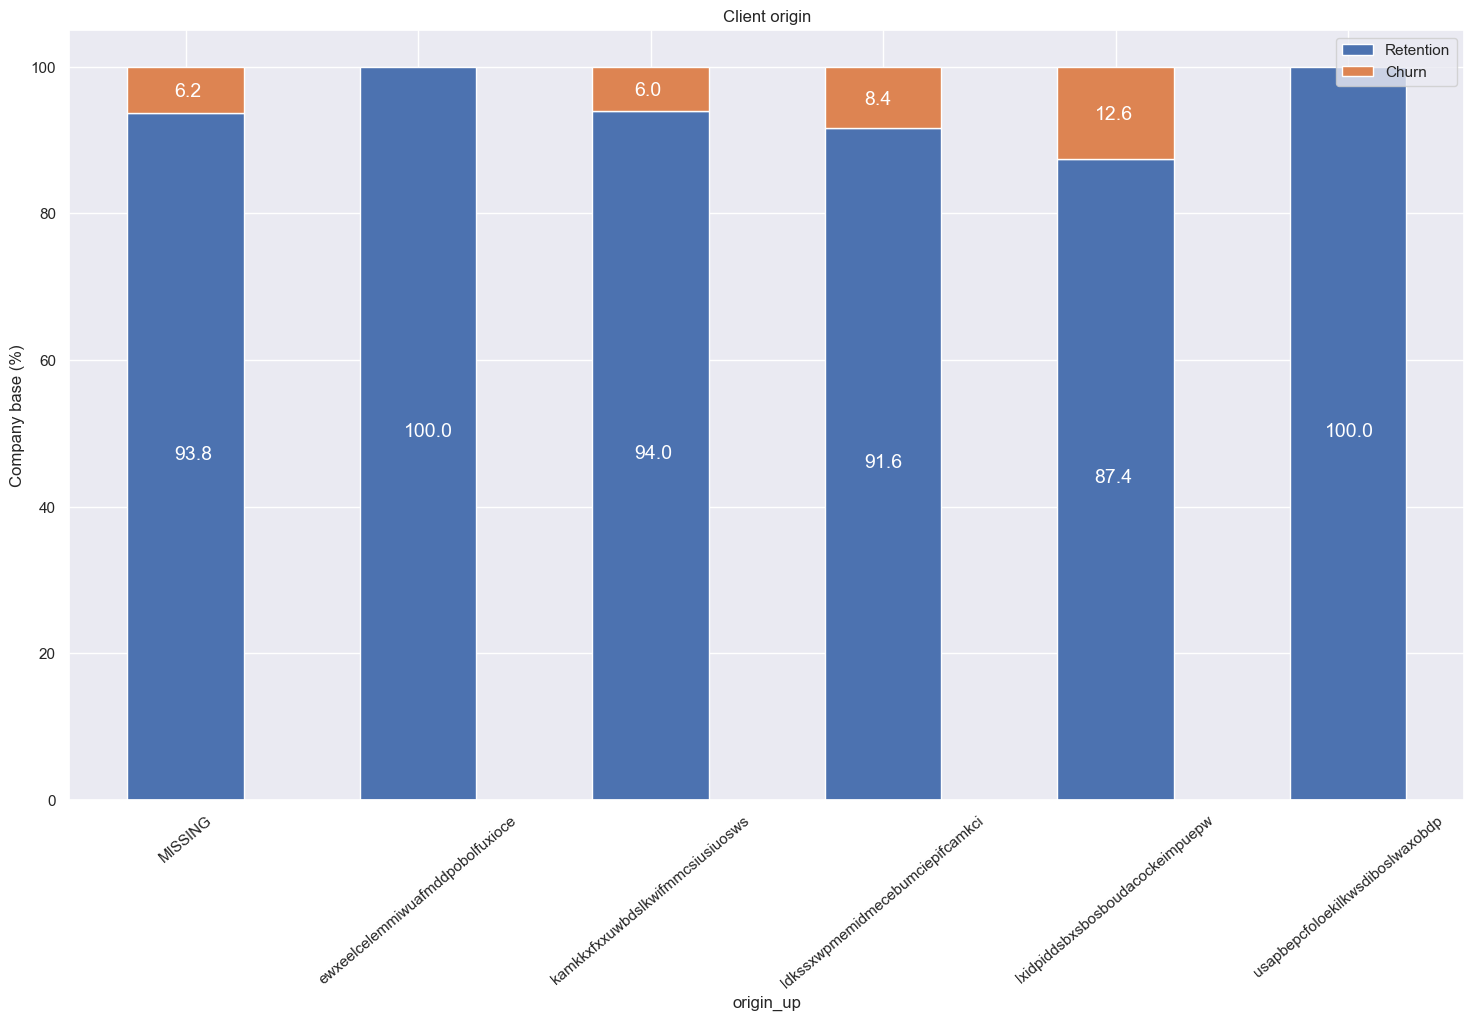

In [29]:
plot_stacked_bars(origin_up_percentage, 'Client origin', rot_ = 40)

### Consumptions

In [8]:
cons_df = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

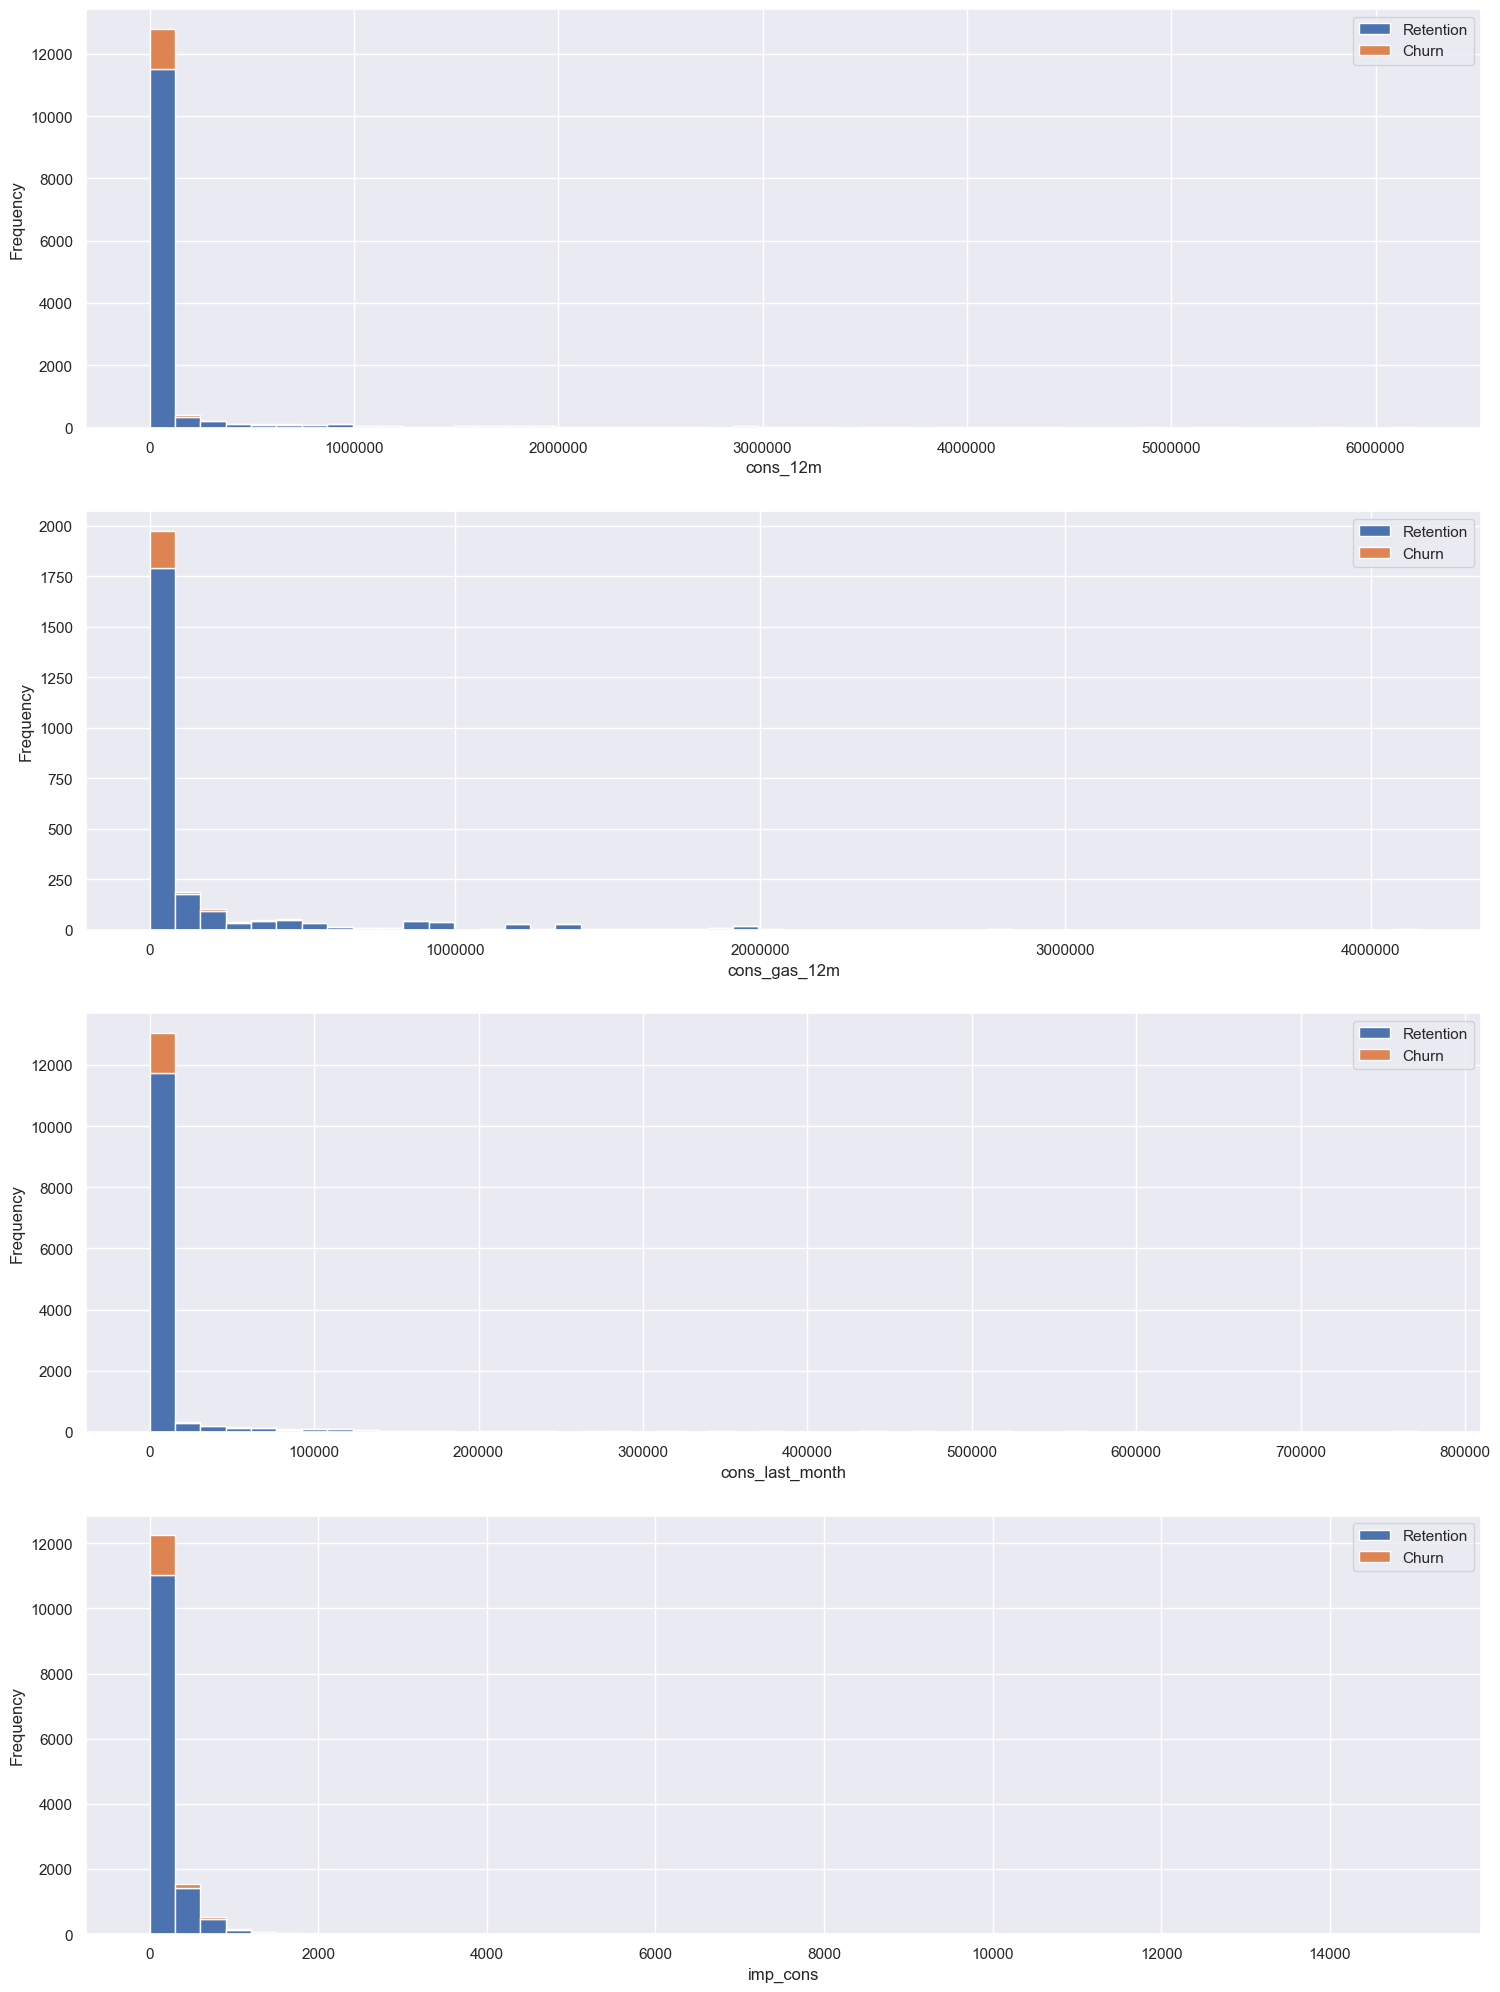

In [31]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(cons_df, 'cons_12m', axs[0])
plot_distribution(cons_df[cons_df['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(cons_df, 'cons_last_month', axs[2])
plot_distribution(cons_df, 'imp_cons', axs[3])

plt.savefig("Distribution of the consumption.png", bbox_inches="tight")

We have to solve skew issues by using boxplots to check from outliers

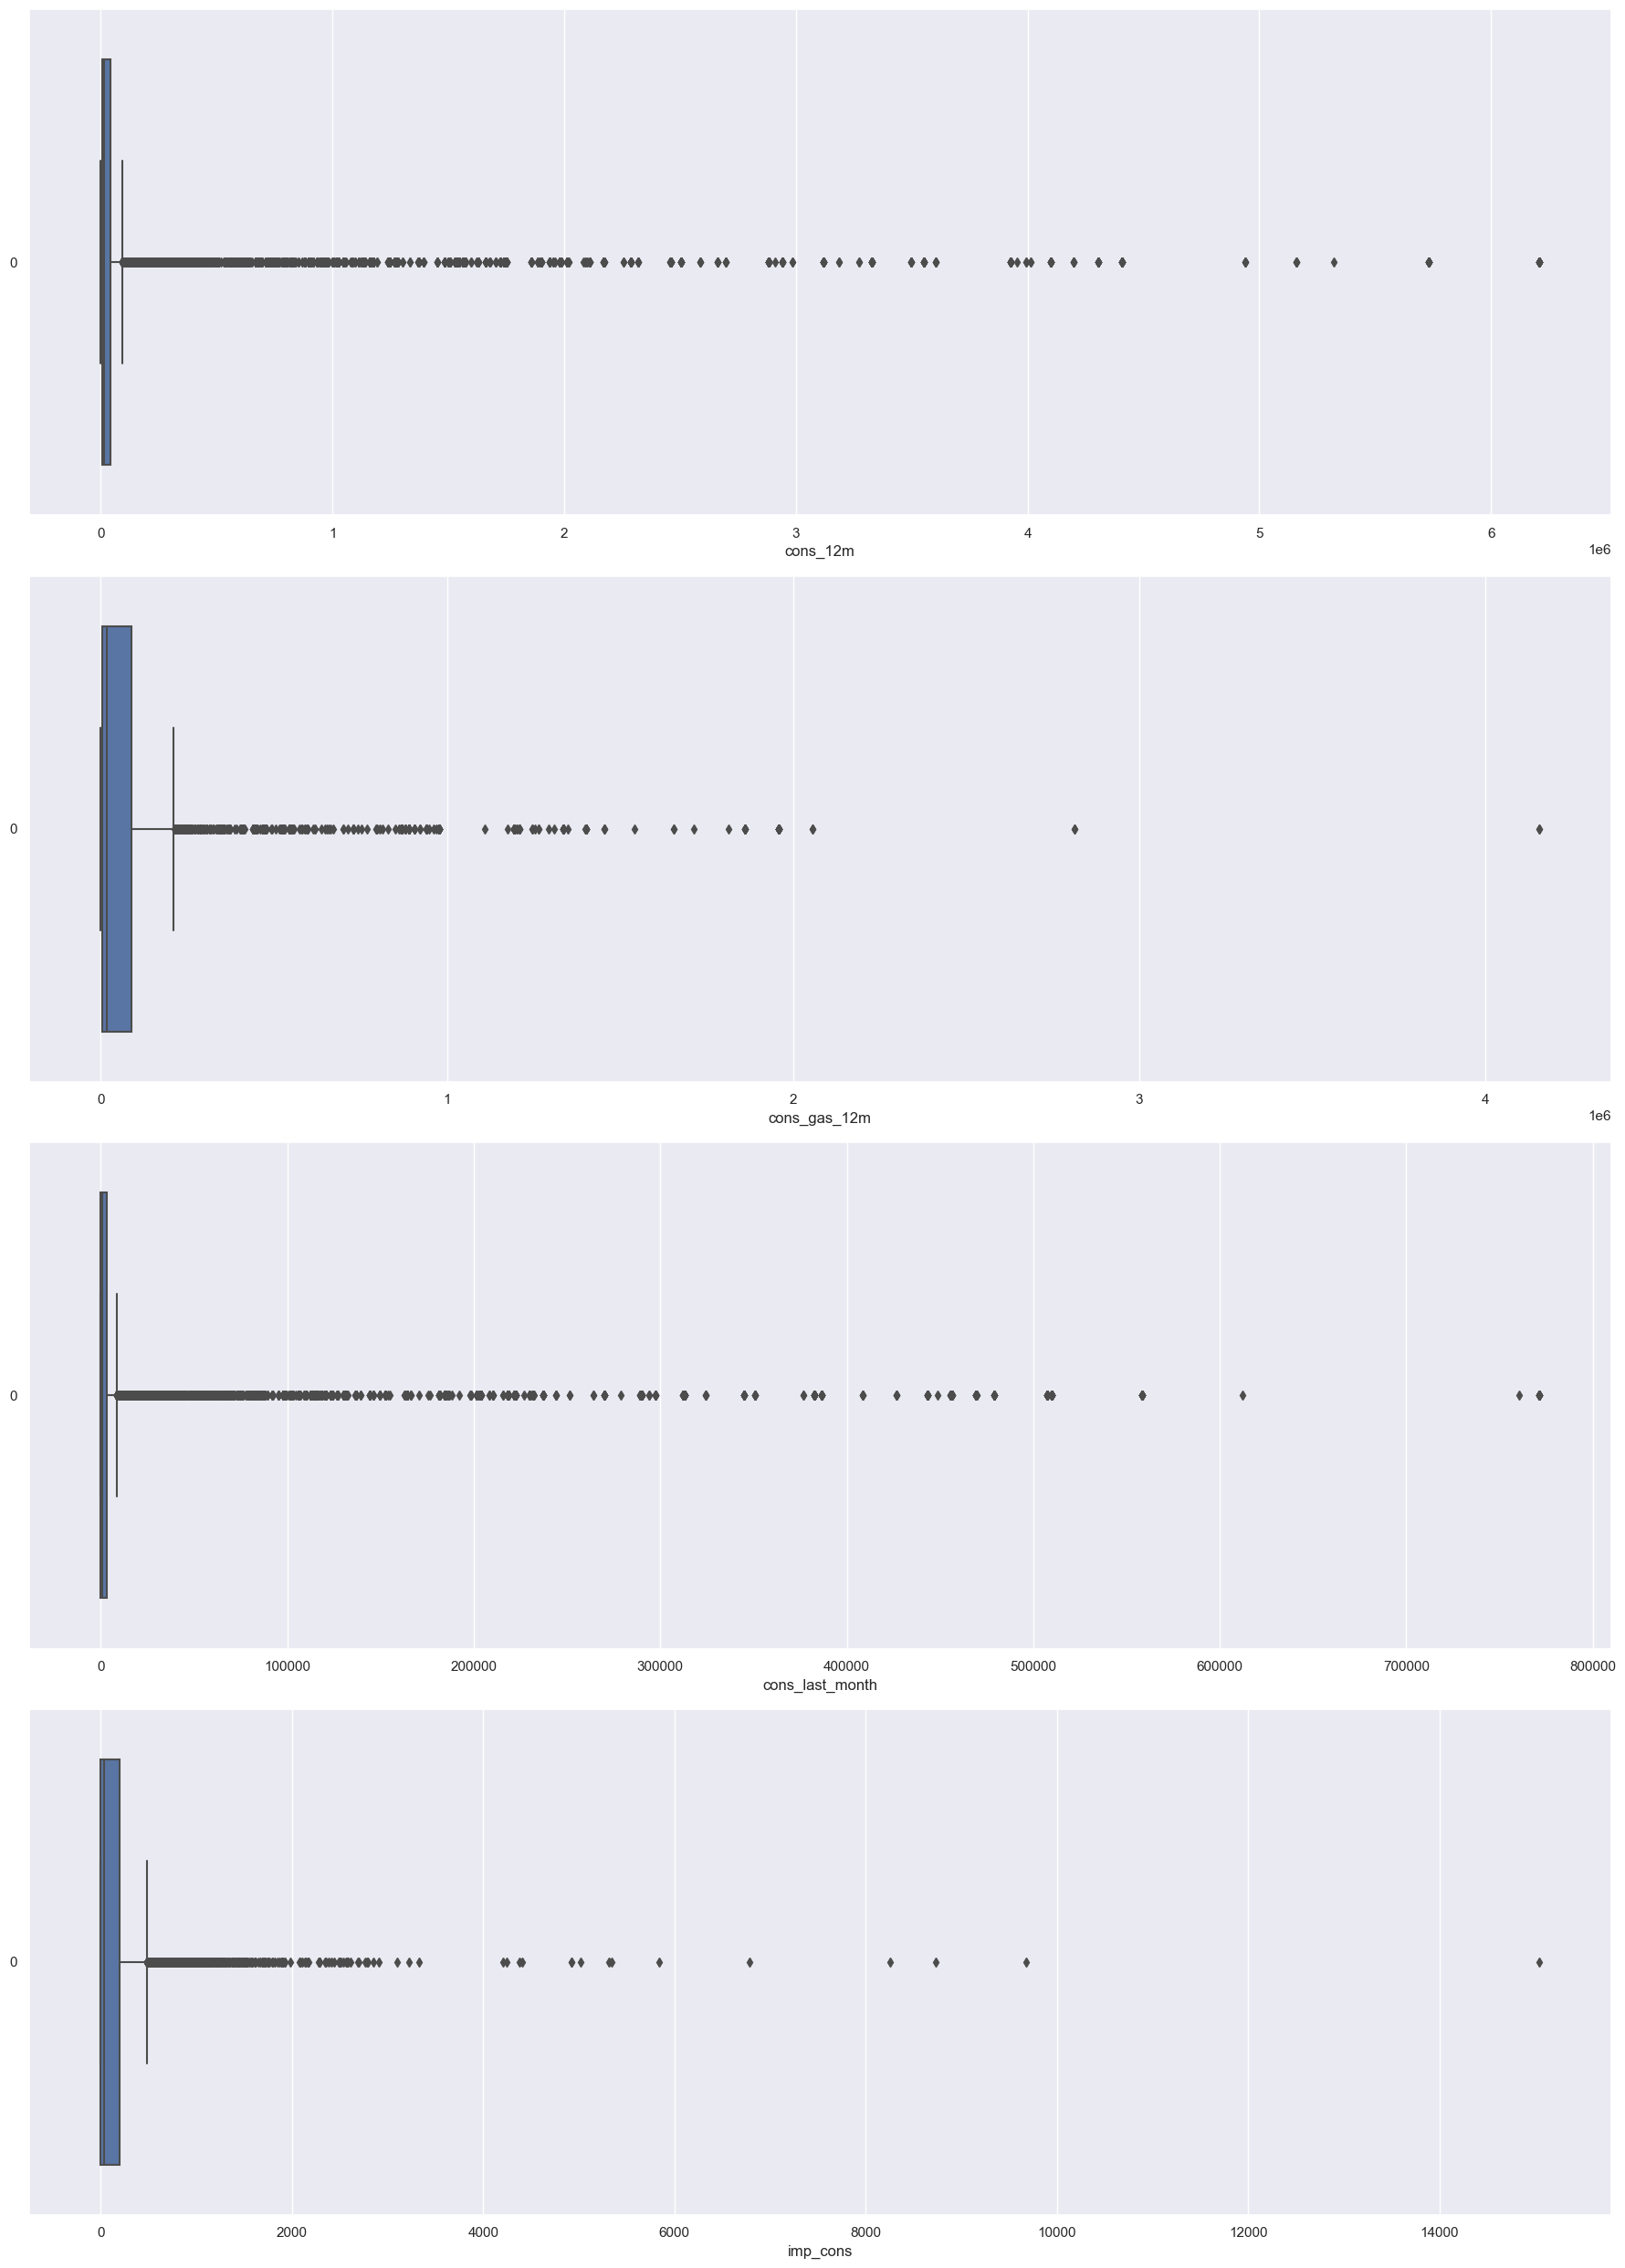

In [17]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Plot boxplot
sns.boxplot(cons_df["cons_12m"], orient="h", ax=axs[0])
axs[0].set_xlabel('cons_12m')

sns.boxplot(cons_df[cons_df["has_gas"] == "t"]["cons_gas_12m"], orient="h", ax=axs[1])
axs[1].set_xlabel('cons_gas_12m')

sns.boxplot(cons_df["cons_last_month"], orient="h", ax=axs[2])
axs[2].set_xlabel('cons_last_month')

sns.boxplot(cons_df["imp_cons"], orient="h", ax=axs[3])
axs[3].set_xlabel('imp_cons')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

### Forcasted --- churn

In [44]:
forecasted_df = client_df[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

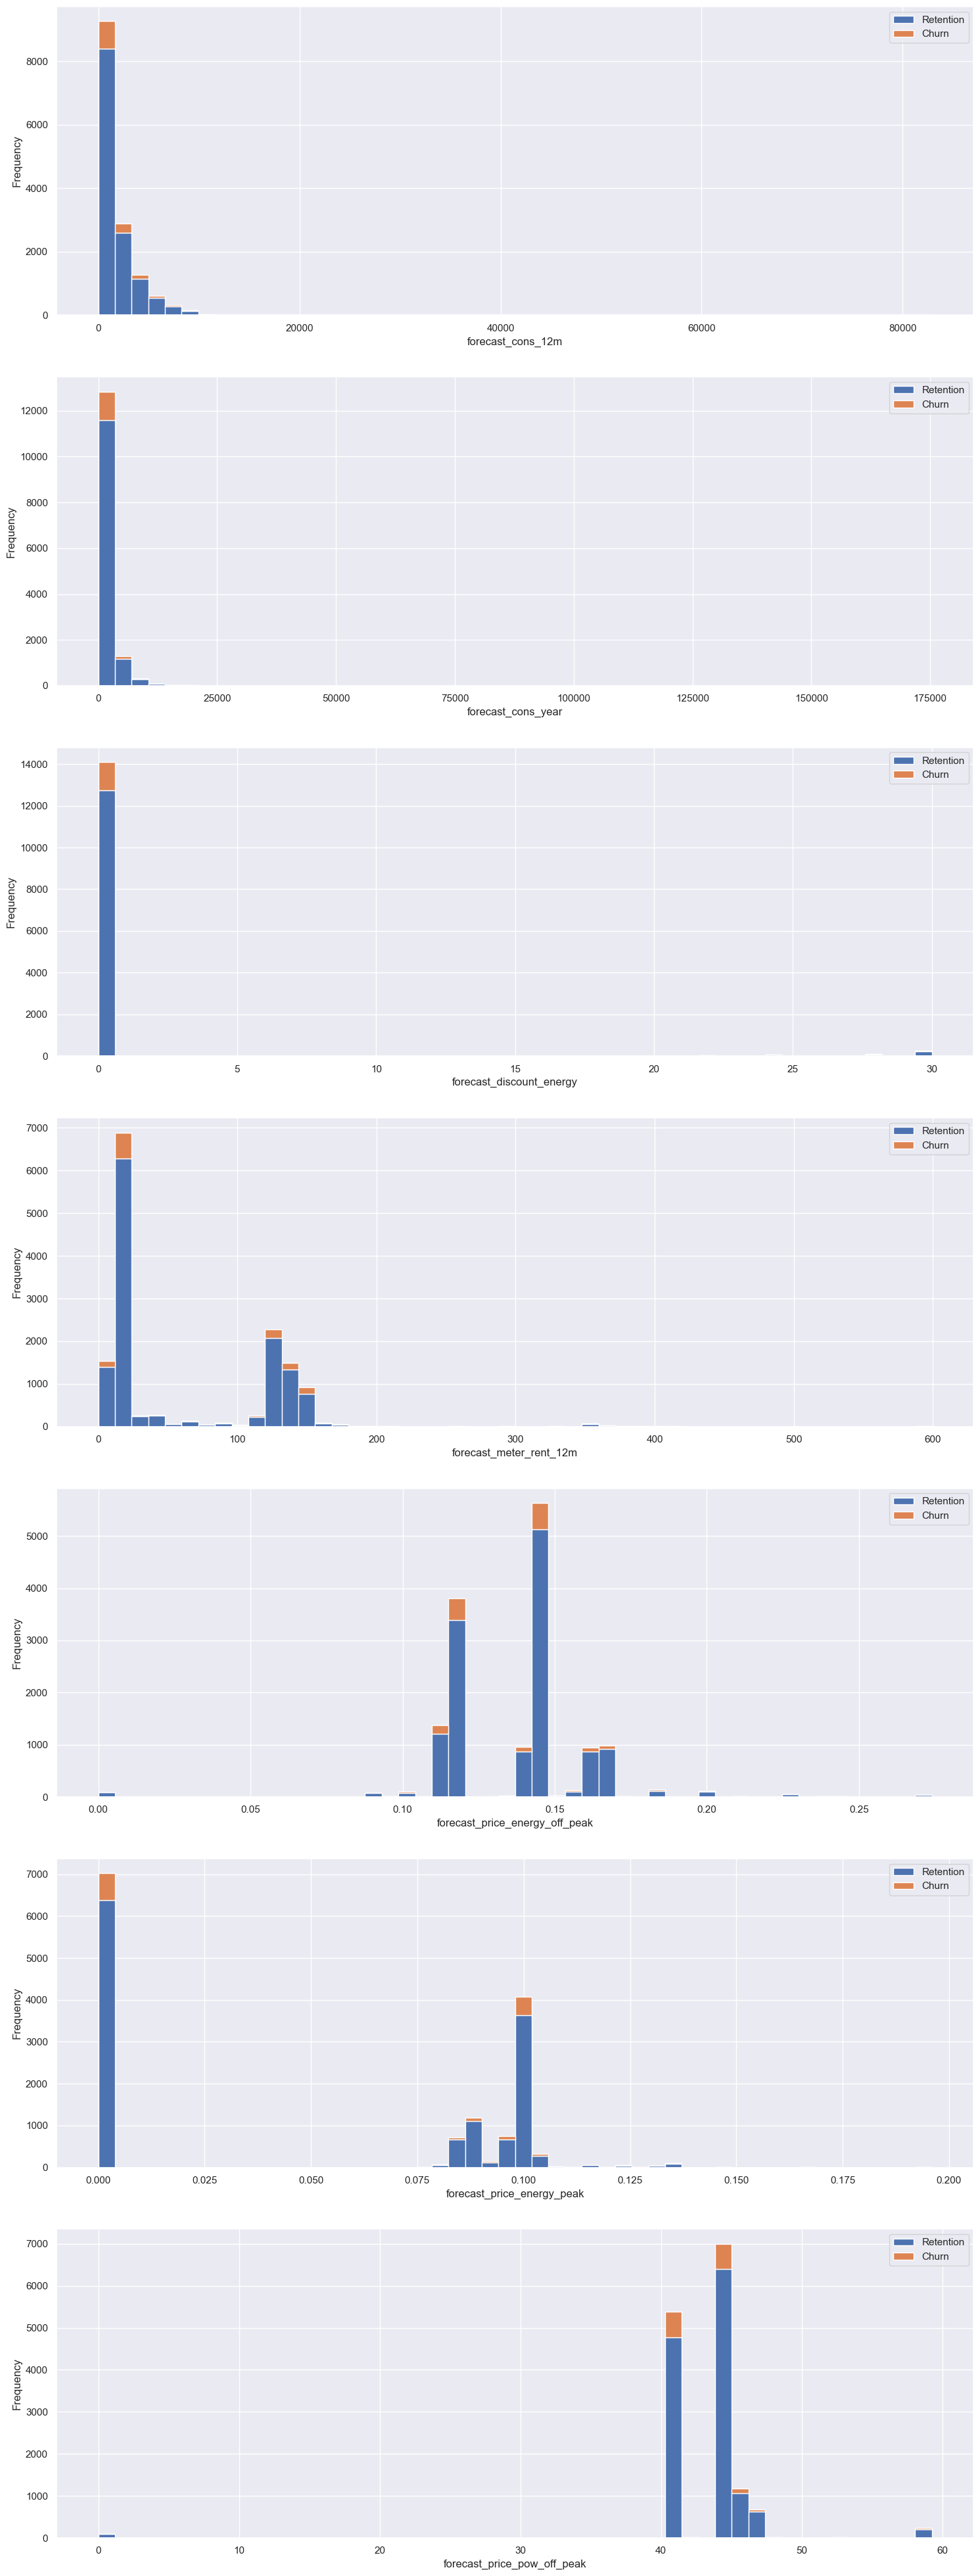

In [45]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

plt.savefig("View of Forecast.png", bbox_inches="tight")

### Margins --- churn

In [19]:
margin_df = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

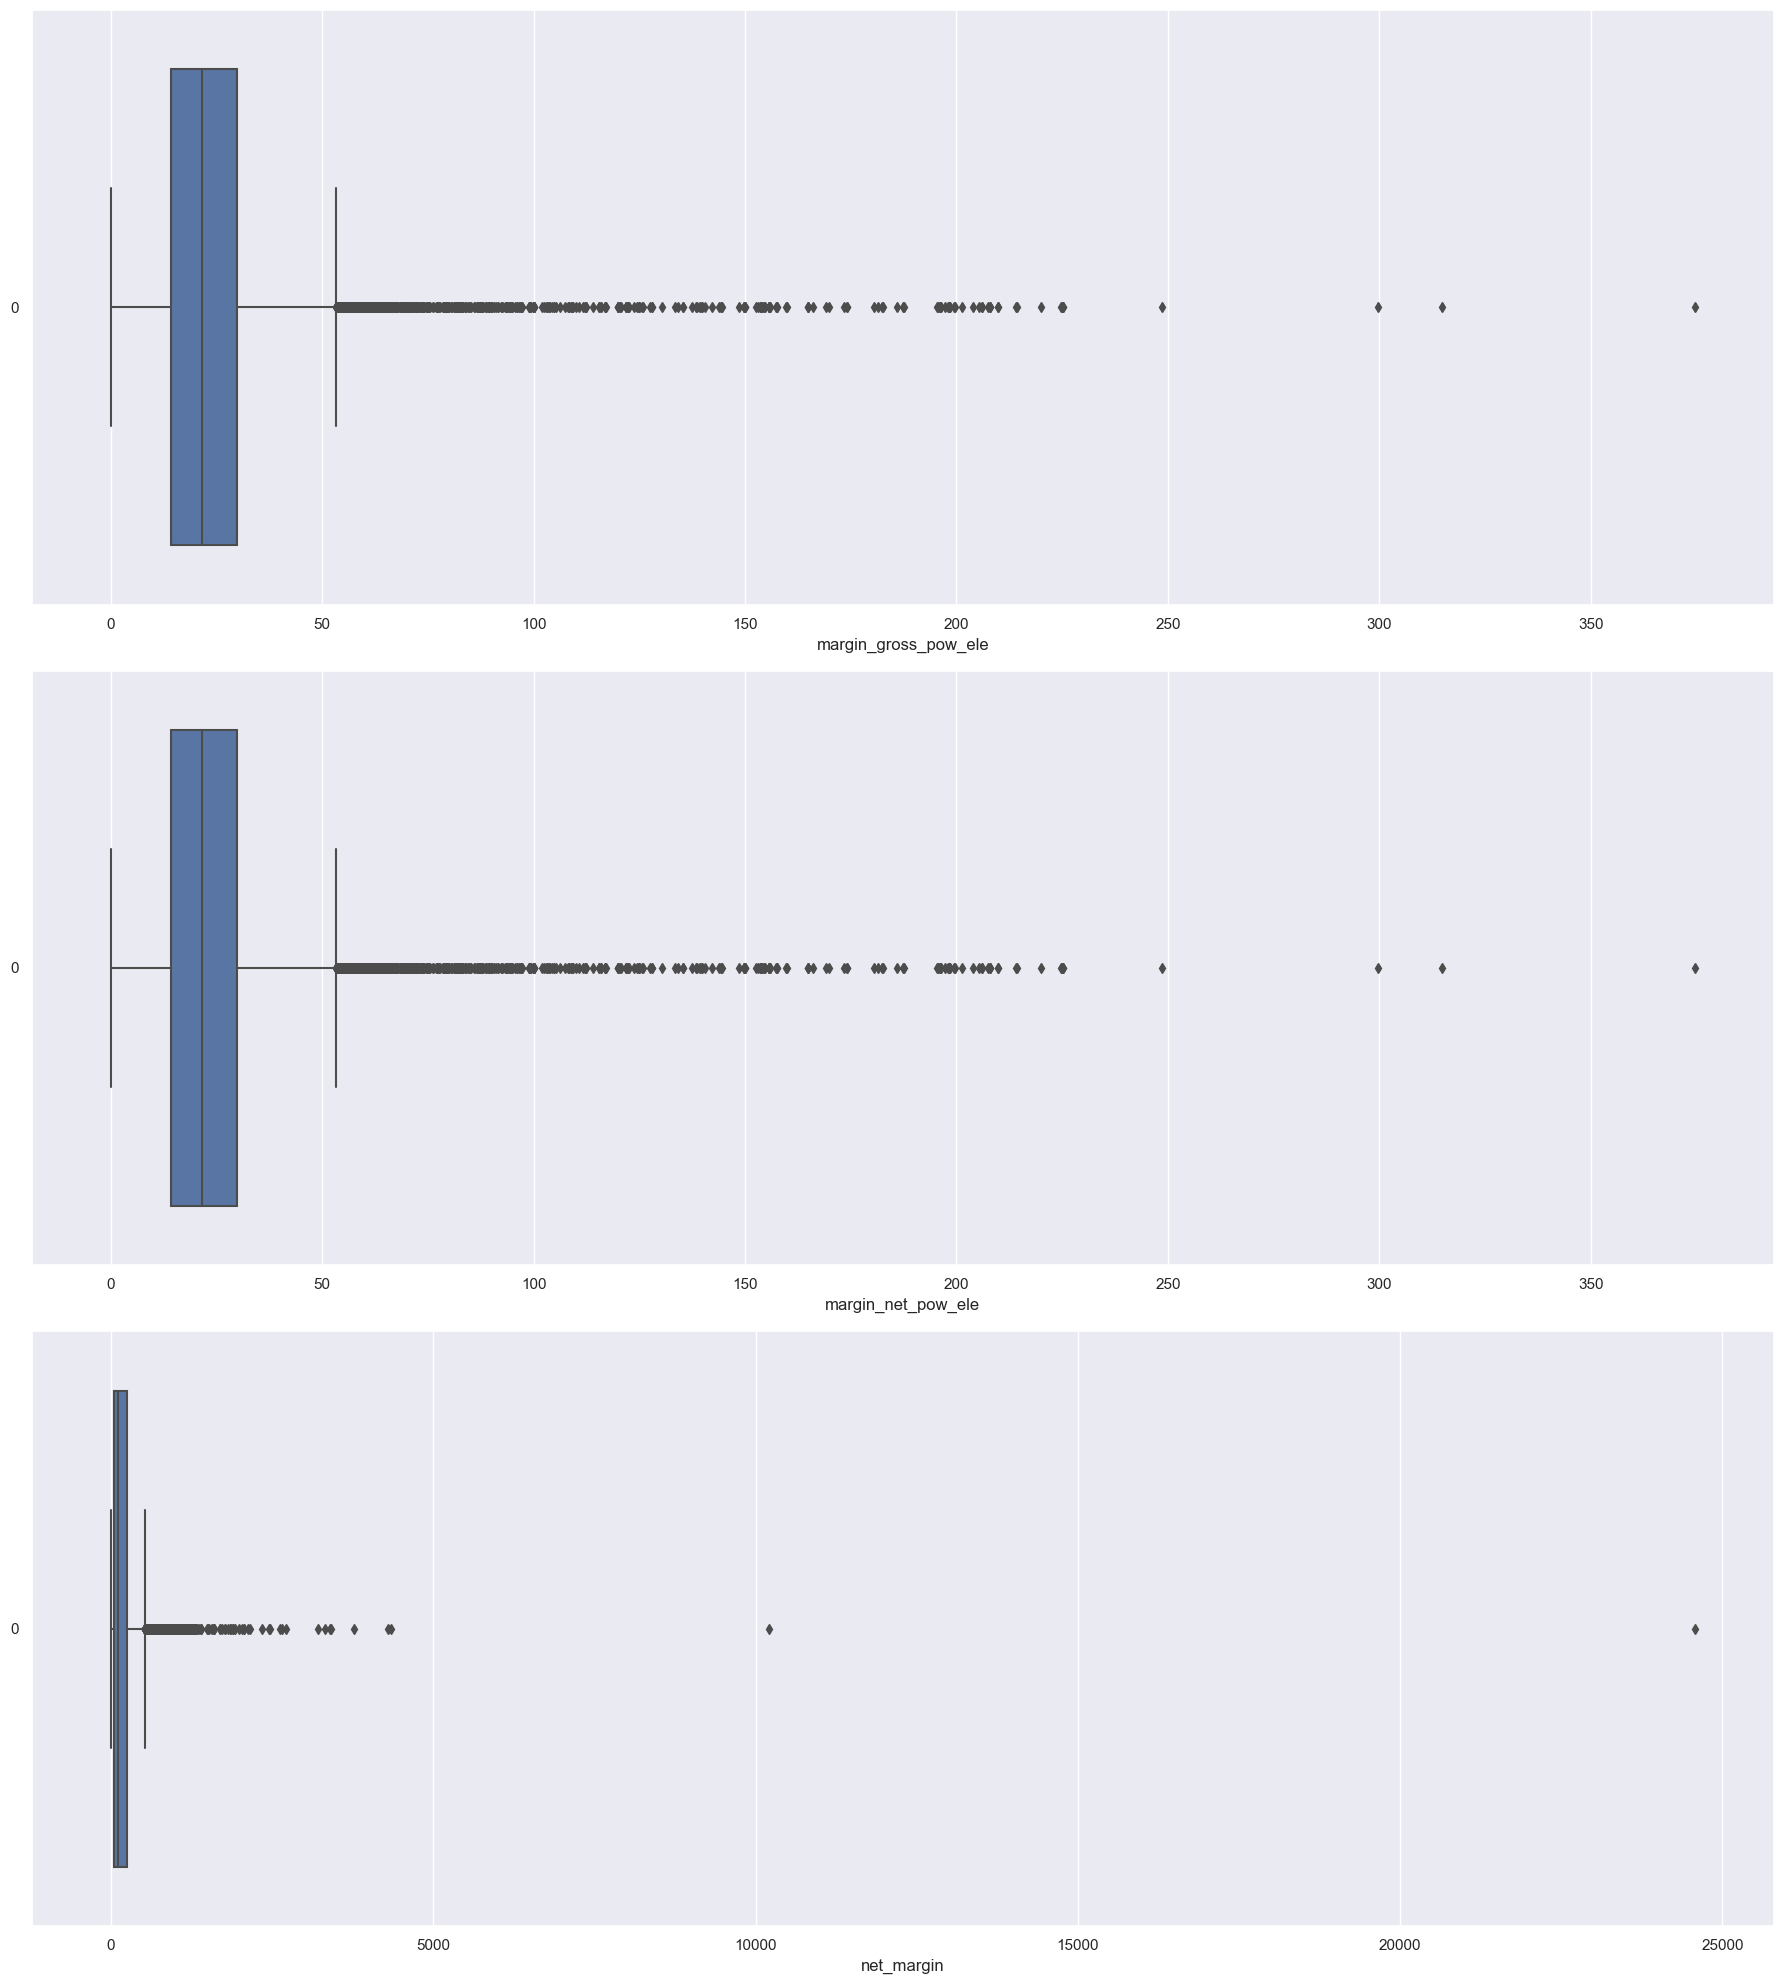

In [20]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

# Plot boxplot
sns.boxplot(margin_df["margin_gross_pow_ele"], orient="h", ax=axs[0])
axs[0].set_xlabel('margin_gross_pow_ele')
sns.boxplot(margin_df["margin_net_pow_ele"], orient="h", ax=axs[1])
axs[1].set_xlabel('margin_net_pow_ele')
sns.boxplot(margin_df["net_margin"],  orient="h", ax=axs[2])
axs[2].set_xlabel('net_margin')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

### Subcribed power --- churn

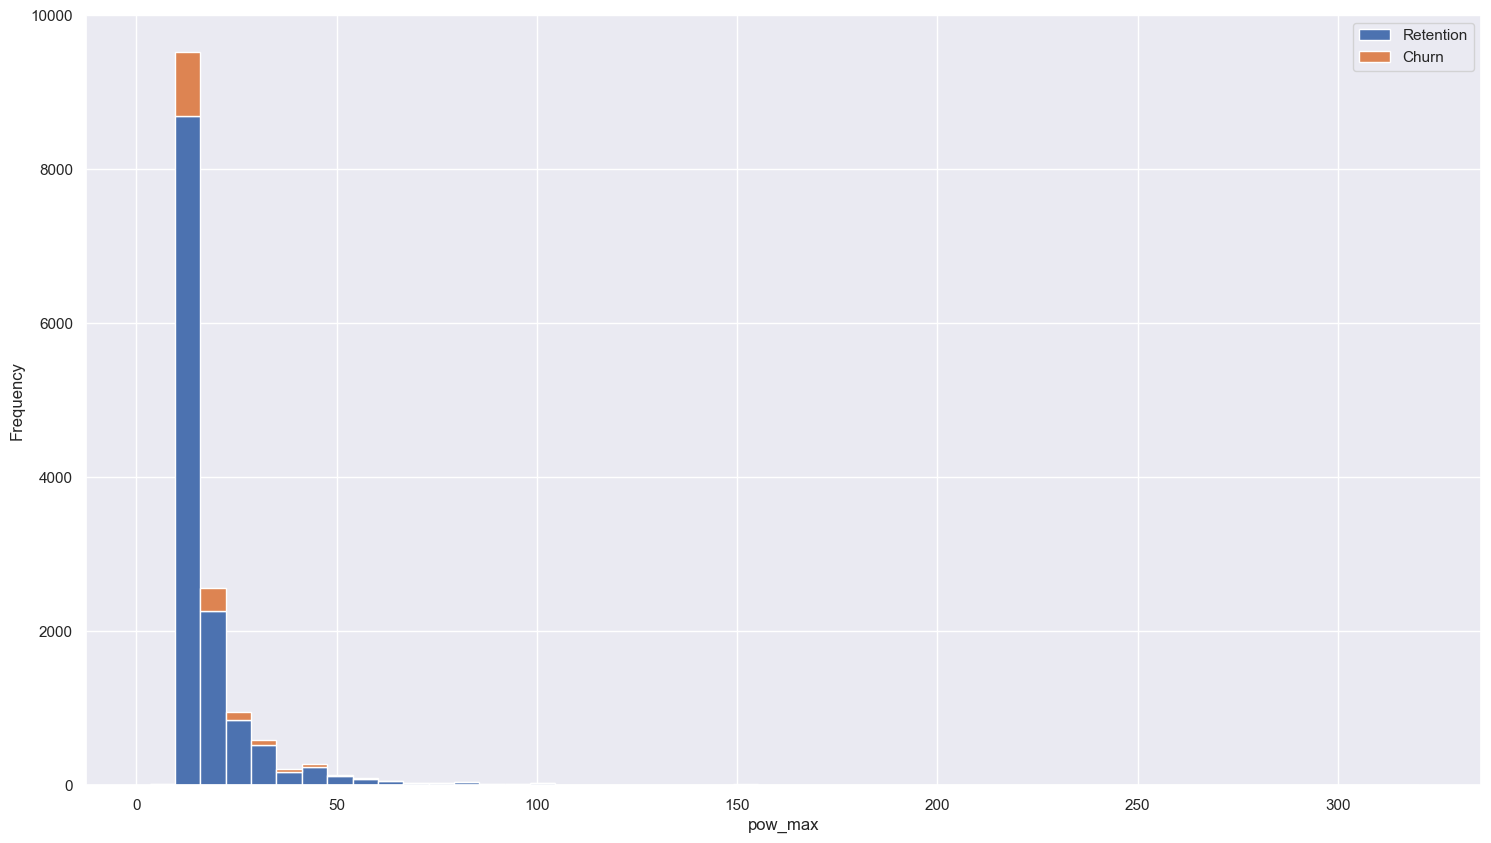

In [21]:
pow_max_df = client_df[['id', 'pow_max', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(pow_max_df, 'pow_max', axs)

plt.savefig("View of Subscribed power.png", bbox_inches="tight")

In [23]:
others_df = client_df[['id', 'nb_prod_act', 'num_years_antig', 'churn']]
nb_prod_act_df = others_df.groupby([others_df["nb_prod_act"], others_df["churn"]])["id"].count().unstack(level=1)
nb_prod_act_df_per = (nb_prod_act_df.div(nb_prod_act_df.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

### Active Products --- churn

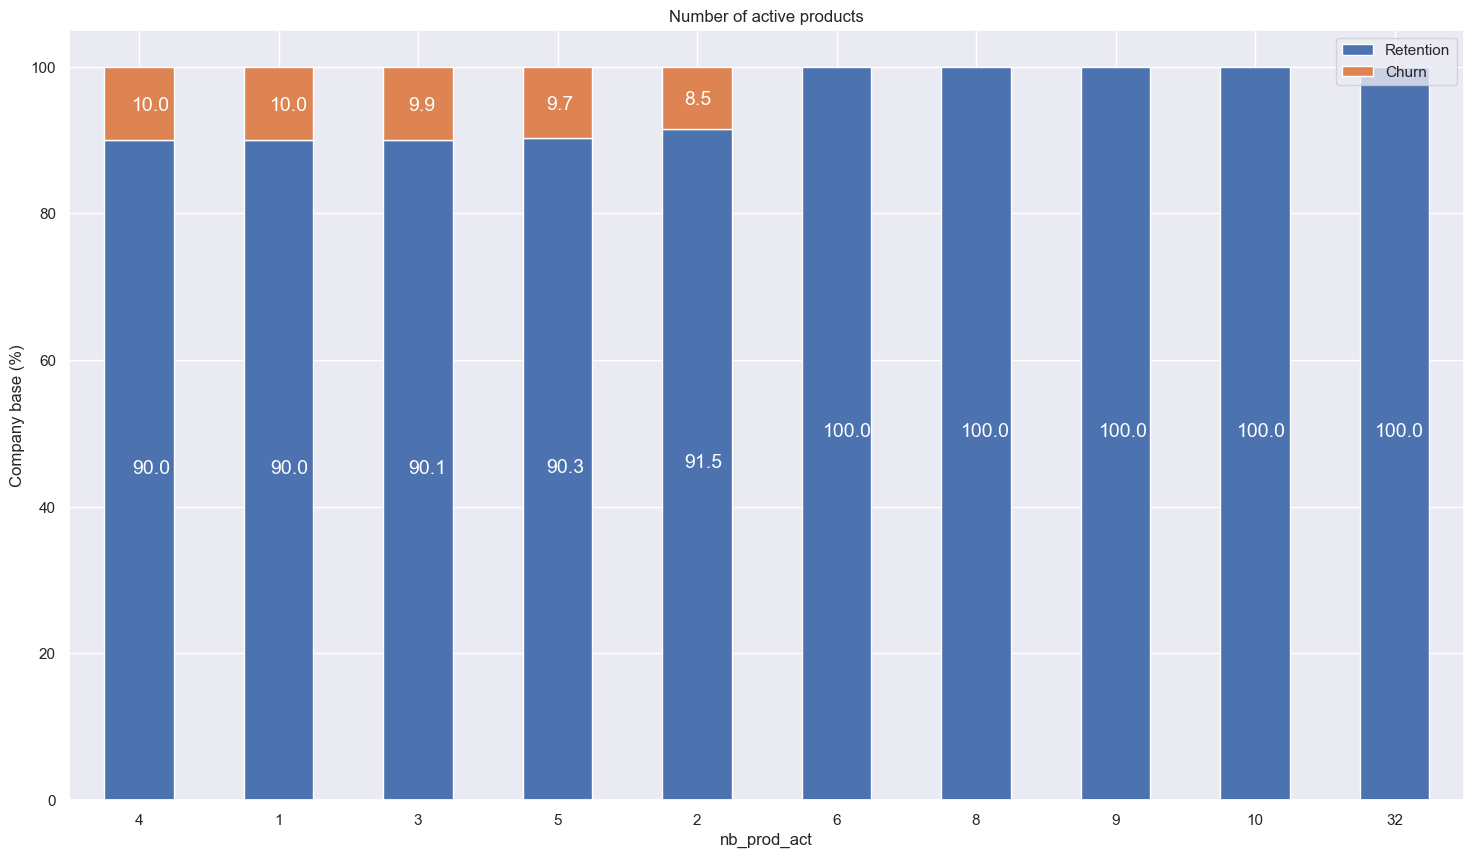

In [24]:
plot_stacked_bars(nb_prod_act_df_per, "Number of active products")

### Client Antiquity --- churn

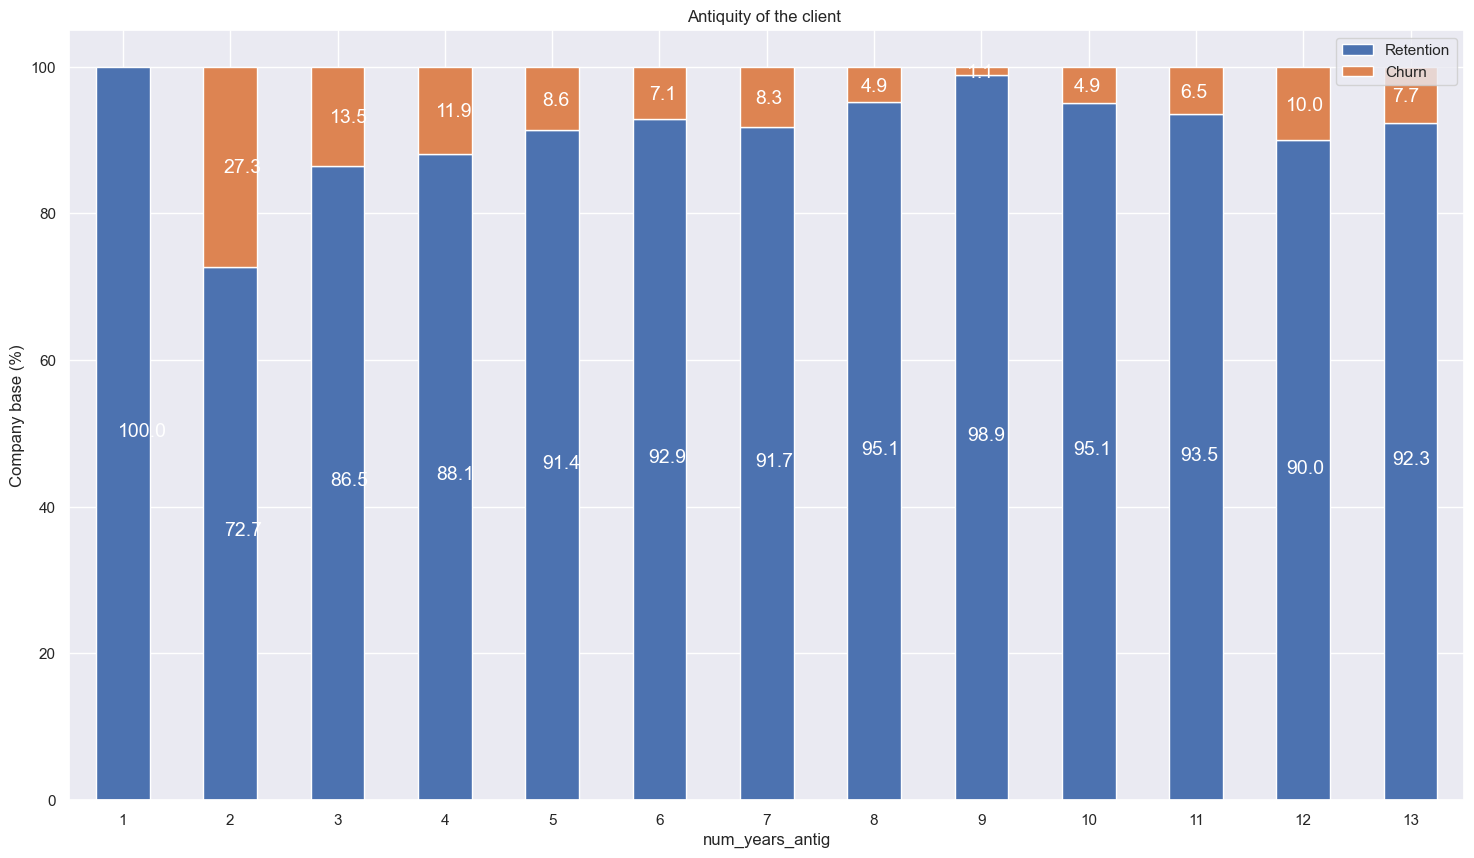

In [27]:
num_years_antig_df = others_df.groupby([others_df["num_years_antig"], others_df["churn"]])["id"].count().unstack(level=1)
num_years_antig_df_per = (num_years_antig_df.div(num_years_antig_df.sum(axis=1), axis=0)*100)
plot_stacked_bars(num_years_antig_df_per, "Antiquity of the client ")

### Dates --- Churn

In [5]:
dates_df=client_df [['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()
#A new dataset that doesn't affect 'client_df' irrespective of changes that'll be made

dates_df['date_activ']=pd.to_datetime(dates_df['date_activ'],format='%Y-%m-%d')
dates_df['date_end']=pd.to_datetime(dates_df['date_end'],format='%Y-%m-%d')
dates_df['date_modif_prod']=pd.to_datetime(dates_df['date_modif_prod'],format='%Y-%m-%d')
dates_df['date_renewal']=pd.to_datetime(dates_df['date_renewal'],format='%Y-%m-%d')

In [6]:
def format_d(label):
    """
    Adjust time label to fit in with the plot
    """
    month=label.month_name()[:1] # Just the first letter of each month will be displayed
    if label.month_name()=="January":
        month+=f'\n{label.year}' #The current year will be written under every 'January'
    return month

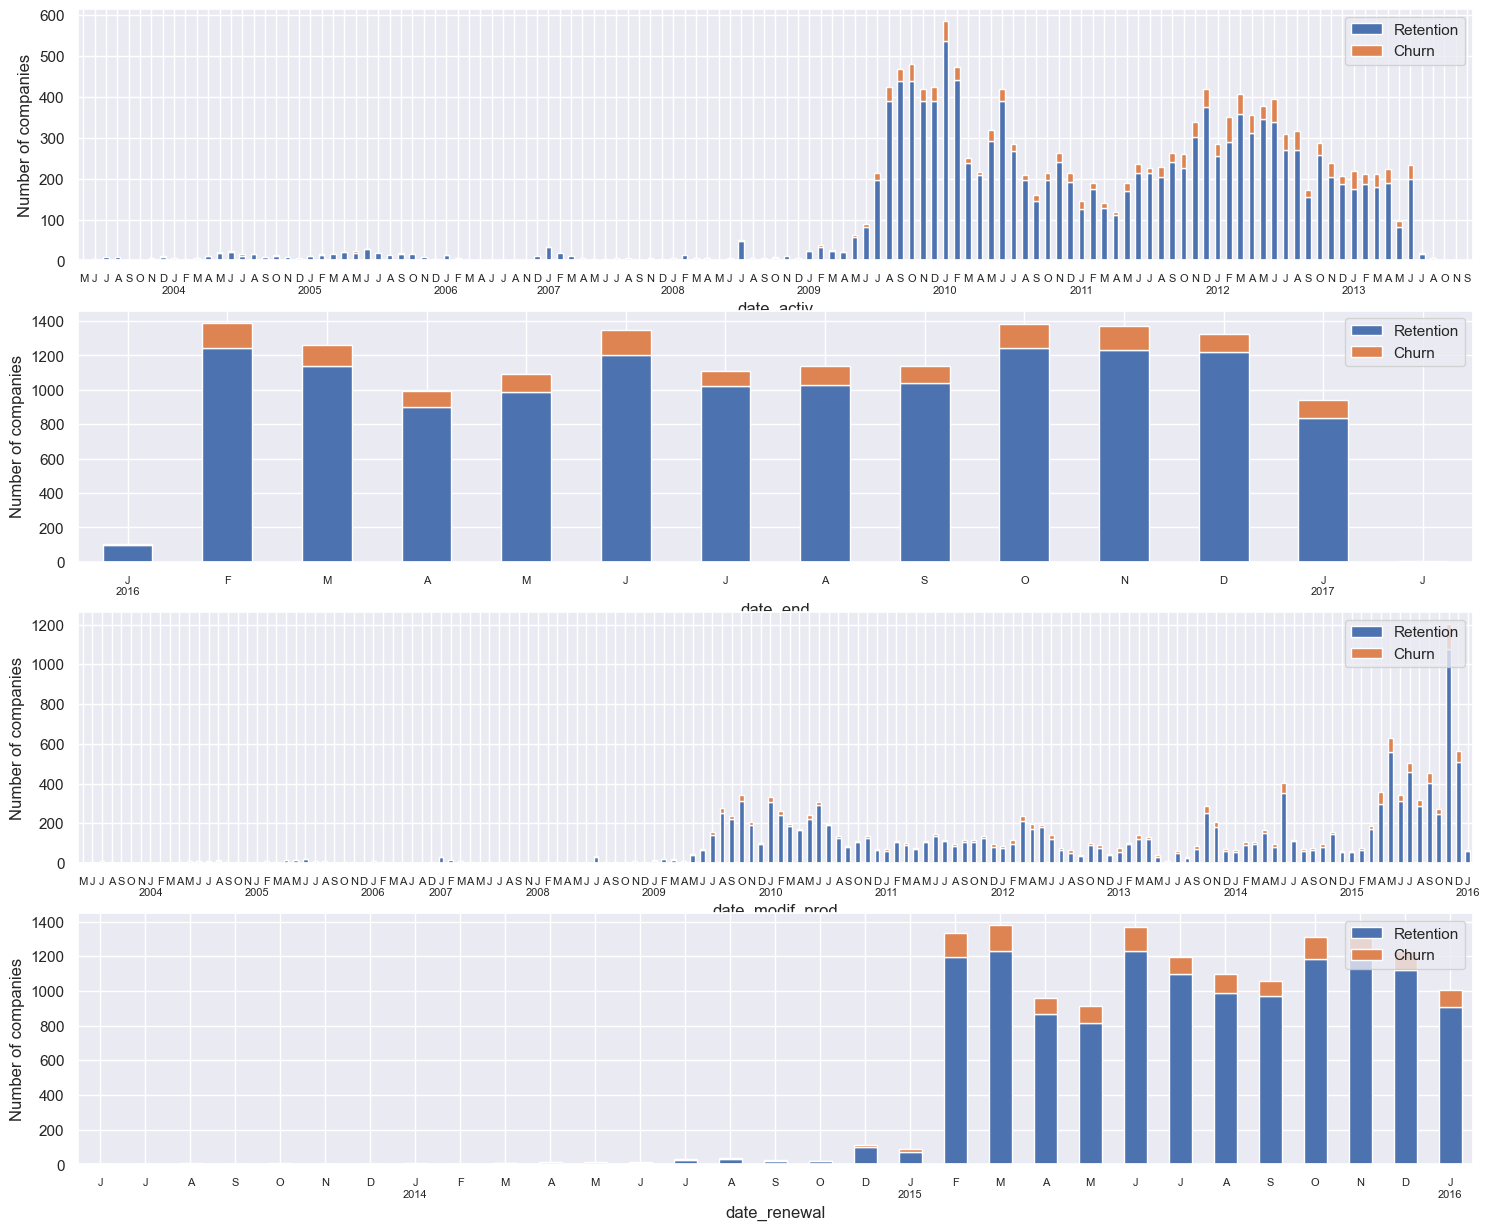

In [8]:
fig,axs=plt.subplots(nrows=4,figsize=(18,15))

date_activ=dates_df[['date_activ','churn','id']].set_index('date_activ').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_activ.plot(kind='bar',stacked=True,rot=0,ax=axs[0])
axs[0].set_xticklabels(map(lambda x:format_d(x),date_activ.index),fontsize=8)
axs[0].set_ylabel("Number of companies")
axs[0].legend(['Retention','Churn'],loc='upper right')

date_end=dates_df[['date_end','churn','id']].set_index('date_end').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_end.plot(kind='bar',stacked=True,rot=0,ax=axs[1])
axs[1].set_xticklabels(map(lambda x:format_d(x),date_end.index),fontsize=8)
axs[1].set_ylabel("Number of companies")
axs[1].legend(['Retention','Churn'],loc='upper right')

date_modif_prod=dates_df[['date_modif_prod','churn','id']].set_index('date_modif_prod').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_modif_prod.plot(kind='bar',stacked=True,rot=0,ax=axs[2])
axs[2].set_xticklabels(map(lambda x:format_d(x),date_modif_prod.index),fontsize=8)
axs[2].set_ylabel("Number of companies")
axs[2].legend(['Retention','Churn'],loc='upper right')

date_renewal=dates_df[['date_renewal','churn','id']].set_index('date_renewal').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_renewal.plot(kind='bar',stacked=True,rot=0,ax=axs[3])
axs[3].set_xticklabels(map(lambda x:format_d(x),date_renewal.index),fontsize=8)
axs[3].set_ylabel("Number of companies")
axs[3].legend(['Retention','Churn'],loc='upper right');

### Now, to test the hypothesis of price sensitivity being to some extent correlated with churn.

We will be looking at the price_df

In [4]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

# Creating 3 new columns to get the avg price over certain periods for each id.

avg_1yr = price_df.groupby(['id']).mean().reset_index()
avg_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
avg_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()


# Combining the 3 columns into a single dataframe
avg_1yr = avg_1yr.rename(index=str, columns={"price_off_peak_var": "avg_year_price_off_peak_var", 
                                                 "price_peak_var": "avg_year_price_peak_var", 
                                                 "price_mid_peak_var": "avg_year_price_mid_peak_var", 
                                                 "price_off_peak_fix": "avg_year_price_off_peak_fix", 
                                                 "price_peak_fix": "avg_year_price_peak_fix", 
                                                 "price_mid_peak_fix": "avg_year_price_mid_peak_fix"})

avg_1yr["avg_year_price_off_peak"] = avg_1yr["avg_year_price_off_peak_var"] + avg_1yr["avg_year_price_off_peak_fix"]
avg_1yr["avg_year_price_peak"] = avg_1yr["avg_year_price_peak_var"] + avg_1yr["avg_year_price_peak_fix"]
avg_1yr["avg_year_price_mid_peak"] = avg_1yr["avg_year_price_mid_peak_var"] + avg_1yr["avg_year_price_mid_peak_fix"]


avg_6m = avg_6m.rename(index=str, columns={"price_off_peak_var": "avg_6m_price_off_peak_var", 
                                             "price_peak_var": "avg_6m_price_peak_var", 
                                             "price_mid_peak_var": "avg_6m_price_mid_peak_var", 
                                             "price_off_peak_fix": "avg_6m_price_off_peak_fix", 
                                             "price_peak_fix": "avg_6m_price_peak_fix", 
                                             "price_mid_peak_fix": "avg_6m_price_mid_peak_fix"})

avg_6m["avg_6m_price_off_peak"] = avg_6m["avg_6m_price_off_peak_var"] + avg_6m["avg_6m_price_off_peak_fix"]
avg_6m["avg_6m_price_peak"] = avg_6m["avg_6m_price_peak_var"] + avg_6m["avg_6m_price_peak_fix"]
avg_6m["avg_6m_price_mid_peak"] = avg_6m["avg_6m_price_mid_peak_var"] + avg_6m["avg_6m_price_mid_peak_fix"]


avg_3m = avg_3m.rename(index=str, columns={"price_off_peak_var": "avg_3m_price_off_peak_var", 
                                             "price_peak_var": "avg_3m_price_peak_var", 
                                             "price_mid_peak_var": "avg_3m_price_mid_peak_var", 
                                             "price_off_peak_fix": "avg_3m_price_off_peak_fix", 
                                             "price_peak_fix": "avg_3m_price_peak_fix", 
                                             "price_mid_peak_fix": "avg_3m_price_mid_peak_fix"})

avg_3m["avg_3m_price_off_peak"] = avg_3m["avg_3m_price_off_peak_var"] + avg_3m["avg_3m_price_off_peak_fix"]
avg_3m["avg_3m_price_peak"] = avg_3m["avg_3m_price_peak_var"] + avg_3m["avg_3m_price_peak_fix"]
avg_3m["avg_3m_price_mid_peak"] = avg_3m["avg_3m_price_mid_peak_var"] + avg_3m["avg_3m_price_mid_peak_fix"]


# Merge into 1 dataframe
price_features = pd.merge(avg_1yr, avg_6m, on='id')
price_features = pd.merge(price_features, avg_3m, on='id')



In [6]:
price_features.head()

,id,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_mid_peak,...,avg_6m_price_mid_peak,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Now we merge with the 'churn' column from client_df to test the hypothesis of price sensitivity being to some extent correlated with churn

In [5]:
price_churn_df = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn_df.head()

,id,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_mid_peak,...,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


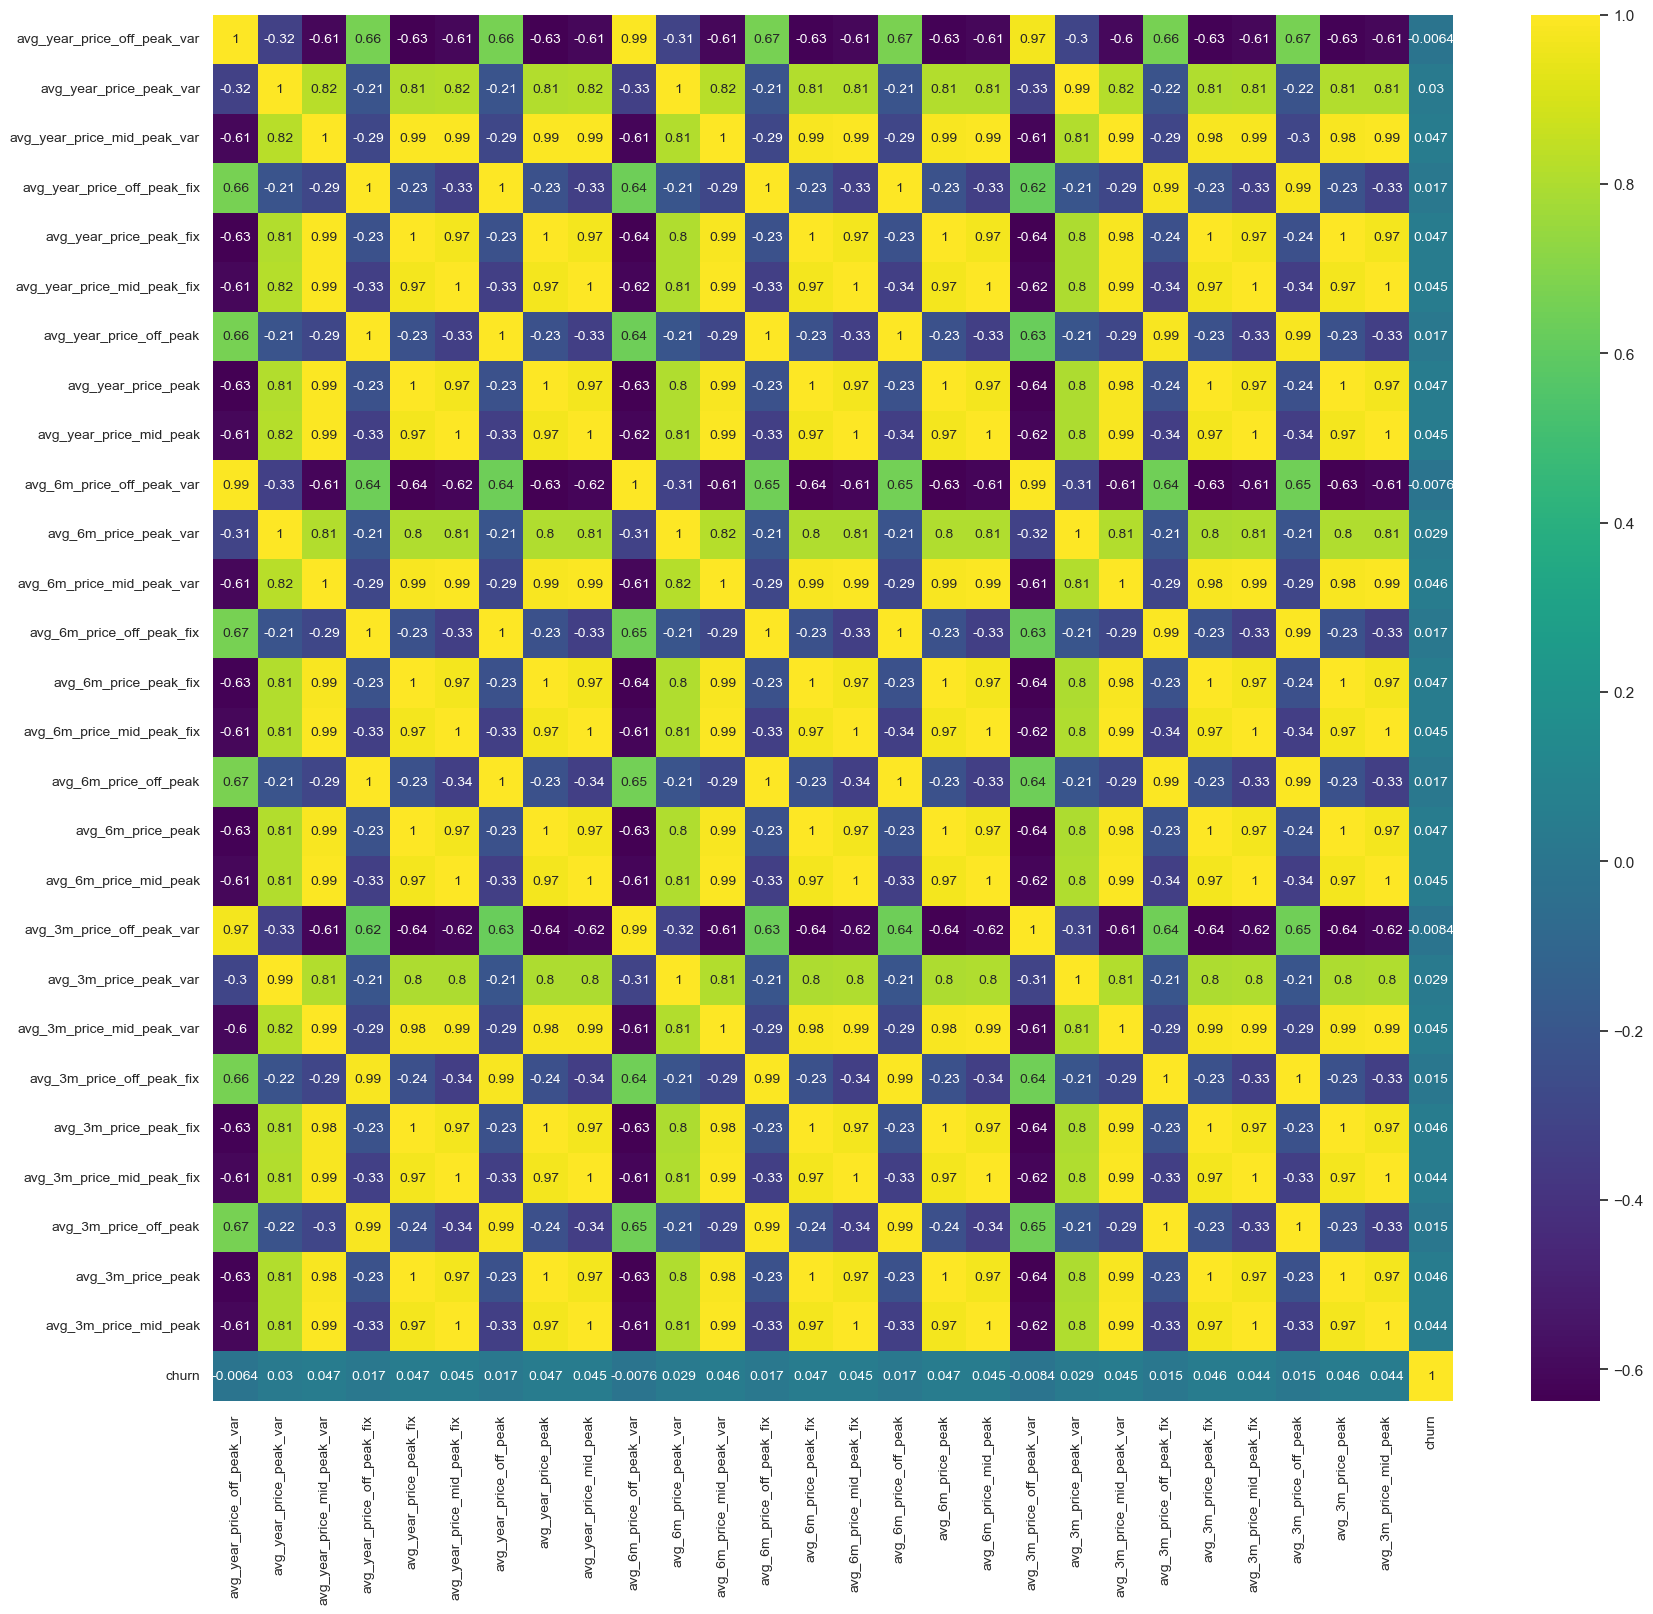

In [10]:
corr = price_churn_df.corr()

# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='viridis', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of Correlation.png", bbox_inches="tight")
plt.show()

Apparently, there is very weak correlation between price change and churn

Let's normalize the price_churn_df to see if this persists

In [7]:
price_churn = price_churn_df.drop(columns=['id'])
price_churn.head()

,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_mid_peak,avg_6m_price_off_peak_var,...,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_mid_peak,churn
0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.123007,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the dataframe
normalized_price_churn = scaler.fit_transform(price_churn)

# Convert the normalized array back to a dataframe
normalized_price_churn_df = pd.DataFrame(normalized_price_churn, columns=price_churn.columns)
normalized_price_churn_df.head()

,avg_year_price_off_peak_var,avg_year_price_peak_var,avg_year_price_mid_peak_var,avg_year_price_off_peak_fix,avg_year_price_peak_fix,avg_year_price_mid_peak_fix,avg_year_price_off_peak,avg_year_price_peak,avg_year_price_mid_peak,avg_6m_price_off_peak_var,...,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_mid_peak,churn
0,-0.799031,1.037192,1.253680,-0.489383,1.241110,1.310403,-0.491722,1.241235,1.310193,-0.797282,...,-0.798038,1.017440,1.241266,-0.498984,1.23186,1.299592,-0.501459,1.232000,1.299376,-0.328046
1,0.182176,-1.043764,-0.789853,0.320093,-0.784971,-0.784767,0.319944,-0.786649,-0.784821,0.187766,...,0.190432,-1.036587,-0.785370,0.297030,-0.78125,-0.781029,0.297026,-0.782929,-0.781081,-0.328046
2,1.742825,-1.043764,-0.789853,0.525391,-0.784971,-0.784767,0.532265,-0.786649,-0.784821,2.599316,...,2.548295,-1.036587,-0.785370,0.618364,-0.78125,-0.781029,0.629528,-0.782929,-0.781081,-0.328046
3,0.248780,-1.043764,-0.789853,0.294049,-0.784971,-0.784767,0.294313,-0.786649,-0.784821,0.250729,...,0.251993,-1.036587,-0.785370,0.258946,-0.78125,-0.781029,0.259389,-0.782929,-0.781081,-0.328046
4,-0.721847,1.072241,1.302850,-0.483417,1.242462,1.311801,-0.485395,1.242726,1.311810,-0.724057,...,-0.726443,1.052592,1.289128,-0.498984,1.23186,1.299592,-0.501088,1.232143,1.299597,-0.328046


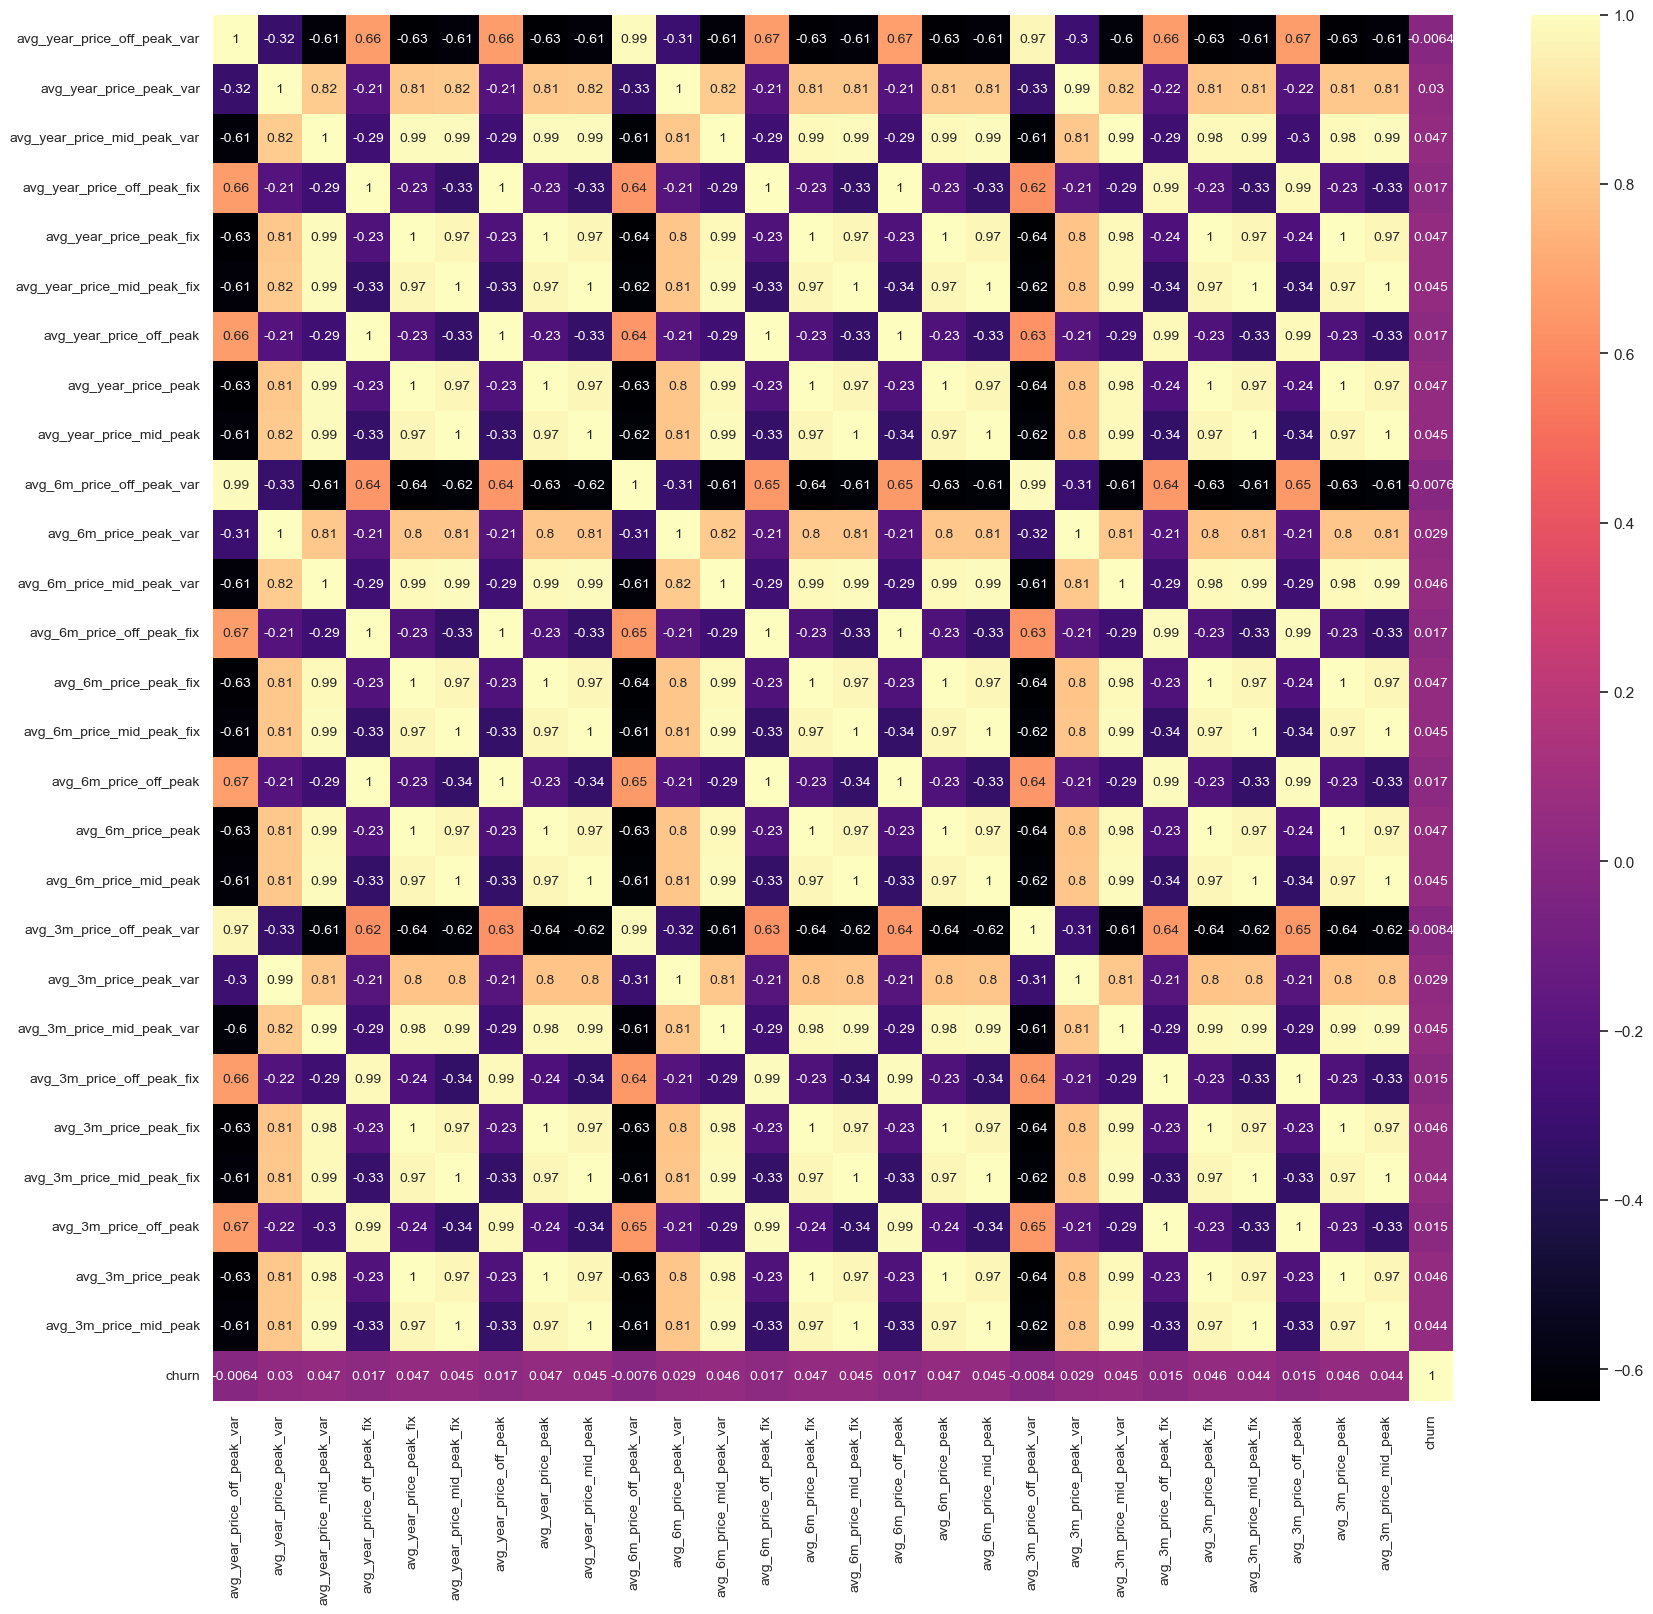

In [11]:
corr = normalized_price_churn_df.corr()

# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='magma', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of Correlation.png", bbox_inches="tight")
plt.show()

Still very weak correlation with churn

Let's merge and save the data

In [12]:
client_and_price_df = pd.merge(client_df.drop(columns=['churn']), price_churn_df, on='id')
client_and_price_df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,avg_3m_price_off_peak_var,avg_3m_price_peak_var,avg_3m_price_mid_peak_var,avg_3m_price_off_peak_fix,avg_3m_price_peak_fix,avg_3m_price_mid_peak_fix,avg_3m_price_off_peak,avg_3m_price_peak,avg_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [13]:
client_and_price_df.to_csv("client_and_price_data.csv")